In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fuel=pd.read_csv('fuel.csv')

In [3]:
fuel.head()
#the dataset has mixed data of numeric and string
#there are null values present in data set.

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [4]:
fuel.shape
#there are total of 907 rows & 27 columns

(907, 27)

In [5]:
#Two predictions are required
#1.Primary Fuel- Classification
#2.capacity_mw - Linear Regression

# Performing EDA

In [6]:
#creating a data frame
fuel = pd.DataFrame(fuel)
fuel

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [7]:
#to find the type of the dataset
type(fuel)
#the dataset type is data frame

pandas.core.frame.DataFrame

In [8]:
fuel.info()
#12 columns have object data type that needs to be converted to numeric 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [9]:
#listing all column names
fuel.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [10]:
#checking for null values
fuel.isnull().sum()

#there are null values in columns- latitude, longitude, other fuel 1, other fuel2 ,other fuel 3 etc
#The columns will null values > 50% of the total values: 
#1. other_fuel1
#2. other_fuel2 (complete blank)
#3. other_fuel3 (complete blank)
#4. owner
#5. wepp_id (complete blank)
#6. generation_gwh_2013 (complete blank)
#7. generation_gwh_2014
#8. generation_gwh_2015
#9. generation_gwh_2016
#10. generation_gwh_2017
#11. generation_gwh_2018
#12. generation_gwh_2019 (complete blank)
#13. generation_data_source
#14. estimated_generation_gwh (complete blank)


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [11]:
#dropping columns with almost no data
fuel = fuel.drop(['other_fuel2', 'other_fuel3','wepp_id','estimated_generation_gwh', 'generation_gwh_2013', 'generation_gwh_2019'], axis = 1)

<AxesSubplot:>

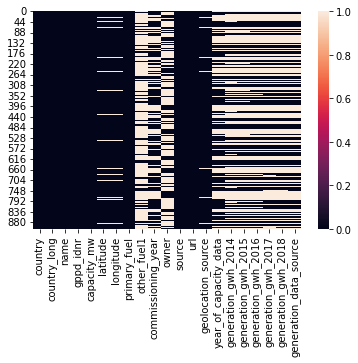

In [12]:
#plotting null values via graph
sns.heatmap(fuel.isnull())

#the blank spcaes show that there are null values present

In [13]:
fuel.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  861.000000  861.000000          527.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.239612    4.939316           17.082868   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   16.773900   74.256200         1988.000000   
50%      59.200000   21.780000   76.719500         2001.000000   
75%     385.250000   25.512400   79.440800         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
count                  519.0           398.000000           422.000000   
mean                  2019.0          2431.823590          2428.226946   
std                      0.0          4026.440035          4194.596959   
min                   2019.0             0.000000             0.000000   
25%                   2019.0           223.557672           176.381063   
50%                   2019.0           801.123775           711.181225   
75%                   2019.0          3035.306250          3084.121250   
max                   2019.0         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           434.000000           440.000000           448.000000  
mean           2467.936859          2547.759305          2600.804099  
std            4162.884308          4196.991169          4314.880456  
min               0.000000             0.000000             0.000000  
25%             188.285252           177.874930           193.378250  
50%             737.205450           817.977250           751.644375  
75%            3282.861313          3275.690475          3143.535900  
max           30015.000000         35116.000000         35136.000000

In [14]:
#now checking each coluumn to either fill values or drop it
fuel.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [15]:
#latitude & longitude
fuel['latitude'].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

In [16]:
fuel['longitude'].value_counts()

71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64

In [17]:
#latitude & longitude- we will fill the missing data with the middle value ie median
fuel['latitude'] = fuel['latitude'].fillna(fuel['latitude'].median())
fuel['longitude'] = fuel['longitude'].fillna(fuel['longitude'].median())
fuel.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [18]:
fuel['other_fuel1'].value_counts()

#three types of other fuels are given, instead of removing the column, I can assume that that the fourth type of fuel is not defined and name is as "Not Defined"

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [19]:
fuel['other_fuel1'] = fuel['other_fuel1'].fillna('Not_Defined')
fuel['other_fuel1'].value_counts()

Not_Defined     709
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [20]:
fuel.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [21]:
#comissioning year
fuel['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [22]:
fuel['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [23]:
#we can find the most occuring comissioning year & owner and fill that year & owner data- mode
#finding mode of this column
fuel['commissioning_year'].mode()

0    2015.0
dtype: float64

In [24]:
m=fuel['owner'].mode()
m

0                      Acc Acc ltd
1                    Jk Cement ltd
2    Sterling Agro Industries ltd.
dtype: object

In [25]:
fuel['commissioning_year'] = fuel['commissioning_year'].fillna(2015)
fuel['commissioning_year'].value_counts()

2015.0    408
2013.0     25
2012.0     23
2016.0     19
2010.0     18
         ... 
1946.0      1
1956.0      1
1937.0      1
1949.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [26]:
fuel['owner'] = fuel['owner'].fillna(m[0])

In [27]:
fuel['owner'].value_counts()

Acc Acc ltd                                                    569
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 280, dtype: int64

In [28]:
fuel.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [29]:
fuel['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [30]:
mo = fuel['geolocation_source'].mode()
mo

0    WRI
dtype: object

In [31]:
fuel['geolocation_source'] = fuel['geolocation_source'].fillna(mo[0])
fuel.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [32]:
fuel['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [33]:
#there is just single value in it, we can drop this column 
fuel = fuel.drop(['year_of_capacity_data'],  axis = 1)
fuel.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [34]:
#for the generation_gwh data for various years, filling the missing data with the mean 

In [35]:
fuel['generation_gwh_2014'].value_counts()


0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [36]:
fuel['generation_gwh_2014'] = fuel['generation_gwh_2014'].fillna(fuel['generation_gwh_2014'].mean())

In [37]:
fuel['generation_gwh_2015'].value_counts()

0.000000        27
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
                ..
6996.000000      1
14192.000000     1
219.377600       1
288.460450       1
0.994875         1
Name: generation_gwh_2015, Length: 396, dtype: int64

In [38]:
fuel['generation_gwh_2015'] = fuel['generation_gwh_2015'].fillna(fuel['generation_gwh_2015'].mean())

In [39]:
fuel['generation_gwh_2016'].value_counts()

0.000000       30
8470.570000     2
1511.000000     2
886.004428      1
90.644500       1
               ..
1338.095900     1
131.021600      1
6130.019928     1
5931.490000     1
233.596650      1
Name: generation_gwh_2016, Length: 403, dtype: int64

In [40]:
fuel['generation_gwh_2016'] = fuel['generation_gwh_2016'].fillna(fuel['generation_gwh_2016'].mean())

In [41]:
fuel['generation_gwh_2017'].value_counts()

0.00000        32
170.08530       2
663.77450       1
1632.36715      1
272.73945       1
               ..
15177.00000     1
191.94545       1
307.37540       1
382.43820       1
865.40000       1
Name: generation_gwh_2017, Length: 408, dtype: int64

In [42]:
fuel['generation_gwh_2017'] = fuel['generation_gwh_2017'].fillna(fuel['generation_gwh_2017'].mean())

In [43]:
fuel['generation_gwh_2018'].value_counts()

0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
                ..
220.551700       1
7321.267900      1
6532.350000      1
15305.220000     1
686.500000       1
Name: generation_gwh_2018, Length: 410, dtype: int64

In [44]:
fuel['generation_gwh_2018'] = fuel['generation_gwh_2018'].fillna(fuel['generation_gwh_2018'].mean())

In [45]:
fuel.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

In [46]:
fuel['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [47]:
#filling the not given values as - "Not_given"
fuel['generation_data_source'] = fuel['generation_data_source'].fillna('Not_given')

In [48]:
fuel.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [49]:
#checking the updated shape- 7 columns dropped
fuel.shape

(907, 20)

<AxesSubplot:>

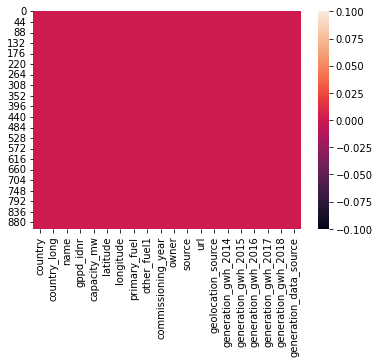

In [50]:
#checking null values via graph
sns.heatmap(fuel.isnull())

#all null values removed

In [51]:
fuel.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [52]:
#checkinf for columns with unique values
fuel.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 4
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      2
dtype: int64

In [53]:
#since we are aware the data is about india power plants, we can drop the columns country & country_long
fuel['country'].value_counts()

IND    907
Name: country, dtype: int64

In [54]:
fuel['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [55]:
fuel= fuel.drop(['country', 'country_long'], axis=1)

In [56]:
fuel.nunique()

name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 4
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      2
dtype: int64

In [57]:
#The columns'name' & ' gppd_idnr' have all different values, hence using the ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(fuel[["name", "gppd_idnr"]])
fuel[["name", "gppd_idnr"]] = enc.transform(fuel[["name", "gppd_idnr"]])

In [58]:
fuel.dtypes

name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [59]:
#dropping column - url as of no use
fuel = fuel.drop(['url'], axis = 1)

In [60]:
#for other columns- primary_fuel, other_fuel1, owner, source, generation_data_source, geolocation_source we are using the label encoder since data is mixed
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [61]:
columns = ['primary_fuel','other_fuel1','owner','source','geolocation_source','generation_data_source']
for i in columns:
    fuel[i] = le.fit_transform(fuel[i])

In [62]:
fuel.head()

#now all the data is numeric

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0   0.0      657.0          2.5   28.1839    73.2407             6   
1   1.0      519.0         98.0   24.7663    74.6090             1   
2   2.0      853.0         39.2   21.9038    69.3732             7   
3   3.0        0.0        135.0   23.8712    91.3602             2   
4   4.0        1.0       1800.0   21.9603    82.4091             1   

   other_fuel1  commissioning_year  owner  source  geolocation_source  \
0            2              2011.0    229     109                   1   
1            2              2015.0    258     174                   2   
2            2              2015.0      2      21                   2   
3            2              2004.0      5      22                   2   
4            3              2015.0      5      22                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  generation_data_source  
0          2547.759305          2600.804099                       1  
1          2547.759305          2600.804099                       1  
2          2547.759305          2600.804099                       1  
3           663.774500           626.239128                       0  
4          5385.579736          7279.000000                       0

In [63]:
fuel['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

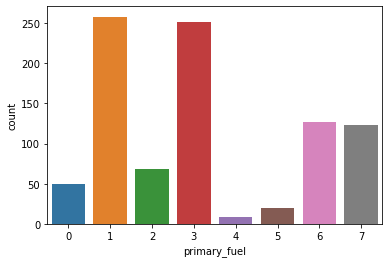

In [64]:
sns.countplot(fuel['primary_fuel'])
#there are 8 different kinds of values in the primary fuel with the coal as the highest and nuclear fuel as least.

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source', ylabel='count'>

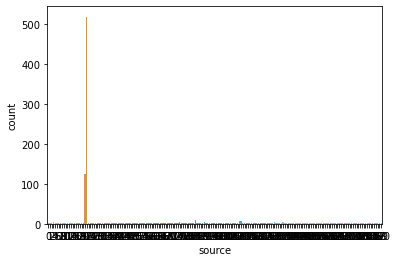

In [65]:
sns.countplot(fuel['source'])
#we can see that there are 519 values with the source as- "Central Electricity Authority" , 124 values with CDM as the source and most of the sources are different sources

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

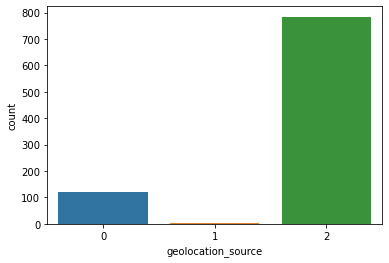

In [66]:
sns.countplot(fuel['geolocation_source'])

#WRI is the maximum values as the geolocation source and the least is NREL

In [67]:
#displaying entire data
pd.set_option('display.max_rows', None)

In [68]:
fuel

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0      0.0      657.0        2.500   28.1839    73.2407             6   
1      1.0      519.0       98.000   24.7663    74.6090             1   
2      2.0      853.0       39.200   21.9038    69.3732             7   
3      3.0        0.0      135.000   23.8712    91.3602             2   
4      4.0        1.0     1800.000   21.9603    82.4091             1   
5      5.0        2.0      250.000   23.7689    68.6447             1   
6      6.0        3.0       60.000   10.4547    77.0078             3   
7      7.0        4.0      192.000   32.2258    77.2070             3   
8      8.0        5.0      290.000   16.3300    75.8863             3   
9      9.0        6.0      210.000   23.1642    81.6373             1   
10    10.0        7.0     1350.000   21.0782    77.9009             1   
11    11.0        8.0      134.000   31.2717    76.4938             3   
12    12.0        9.0     1200.000   24.2007    82.8000             1   
13    13.0       10.0       16.950   31.2412    77.8769             3   
14    14.0       11.0        9.000   21.7800    76.7195             3   
15    15.0       12.0     2630.000   24.2010    82.7891             1   
16    16.0       13.0      419.330   25.1797    76.3188             2   
17    17.0      634.0      600.000   23.0666    81.7841             1   
18    18.0       14.0     1200.000   23.0655    81.7865             1   
19    19.0      576.0       10.000   18.0845    76.1851             0   
20    20.0      577.0       17.000   19.5867    74.7061             0   
21    21.0      542.0       24.000   16.7708    74.9191             0   
22    22.0       15.0      652.000   26.6282    79.5286             2   
23    23.0       16.0      600.000   21.7438    83.2741             1   
24    24.0      578.0       46.000   19.7881    79.1518             1   
25    25.0      656.0       50.000   21.7800    76.7195             6   
26    26.0      704.0        1.000   28.3615    74.2402             6   
27    27.0      669.0       16.500   14.5751    76.3926             7   
28    28.0      705.0       50.000   14.9455    77.6870             6   
29    29.0      883.0      113.600   18.8580    73.6396             7   
30    30.0      831.0       19.800   10.7245    77.1893             7   
31    31.0      668.0       13.200   14.4791    76.3482             7   
32    32.0      706.0        5.000   27.3473    71.6917             6   
33    33.0      707.0        5.000   27.3600    71.6918             6   
34    34.0      708.0        5.000   27.3632    71.6918             6   
35    35.0      709.0        5.000   27.3661    71.6916             6   
36    36.0      710.0        5.000   27.3537    71.6917             6   
37    37.0      711.0        5.000   27.3504    71.6918             6   
38    38.0      712.0        5.000   27.3566    71.6917             6   
39    39.0       17.0      705.000   28.5060    77.3066             1   
40    40.0      543.0       28.000   16.2804    75.2250             0   
41    41.0       18.0      450.000   33.1815    75.3155             3   
42    42.0       19.0      450.000   21.7800    76.7195             3   
43    43.0       20.0      180.000   32.8063    76.1418             3   
44    44.0       21.0     1050.000   23.8285    87.4513             1   
45    45.0       23.0      600.000   21.7800    76.7195             1   
46    46.0       22.0      510.000   18.1396    82.1221             3   
47    47.0      579.0       67.500   19.8601    79.3421             1   
48    48.0      520.0       10.000   24.6929    74.6890             1   
49    49.0       24.0      300.000   22.3421    82.4305             1   
50    50.0       25.0      335.000   22.9956    88.4042             1   
51    51.0       26.0       12.000   32.1686    76.4695             3   
52    52.0       27.0      315.000   24.1917    81.2875             3   
53    53.0       28.0       30.000   24.1917    81.2875         

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

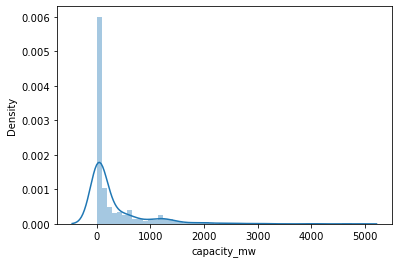

In [69]:
sns.distplot(fuel["capacity_mw"],kde=True)

#the capacity_mw column has the maximum values between 0-100 and least data values between 2000 to 5000


C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

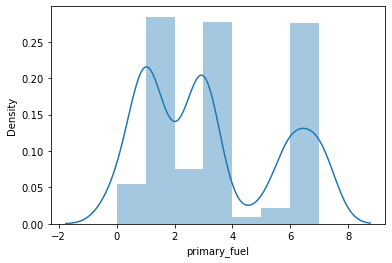

In [70]:
sns.distplot(fuel["primary_fuel"],kde=True)

#the primary fuel has maximum distibution of data between 0-4 ie coal & Hydro


C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

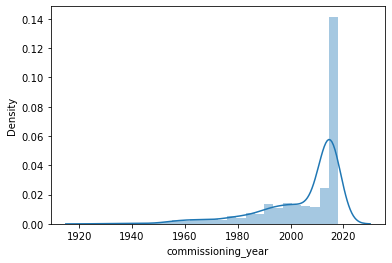

In [71]:
sns.distplot(fuel["commissioning_year"],kde=True)

#the commissioning year data has maximum distribution for between years 1980 to 2010

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='source', ylabel='Density'>

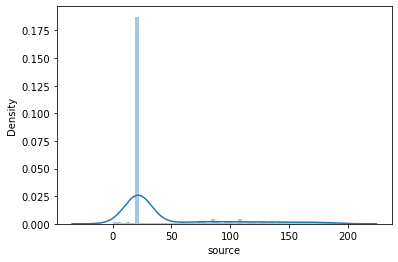

In [72]:
sns.distplot(fuel["source"],kde=True)

#the most used source is CEA and the encoded value of it is around 22-25

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

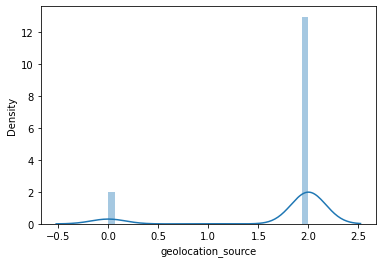

In [73]:
sns.distplot(fuel["geolocation_source"],kde=True)
             
#WRI is the mostly used as geolocation source , we can say that the encoded value 1.5 to 2.5 have maximum entries

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

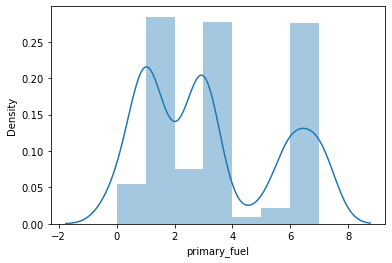

In [74]:
sns.distplot(fuel["primary_fuel"])

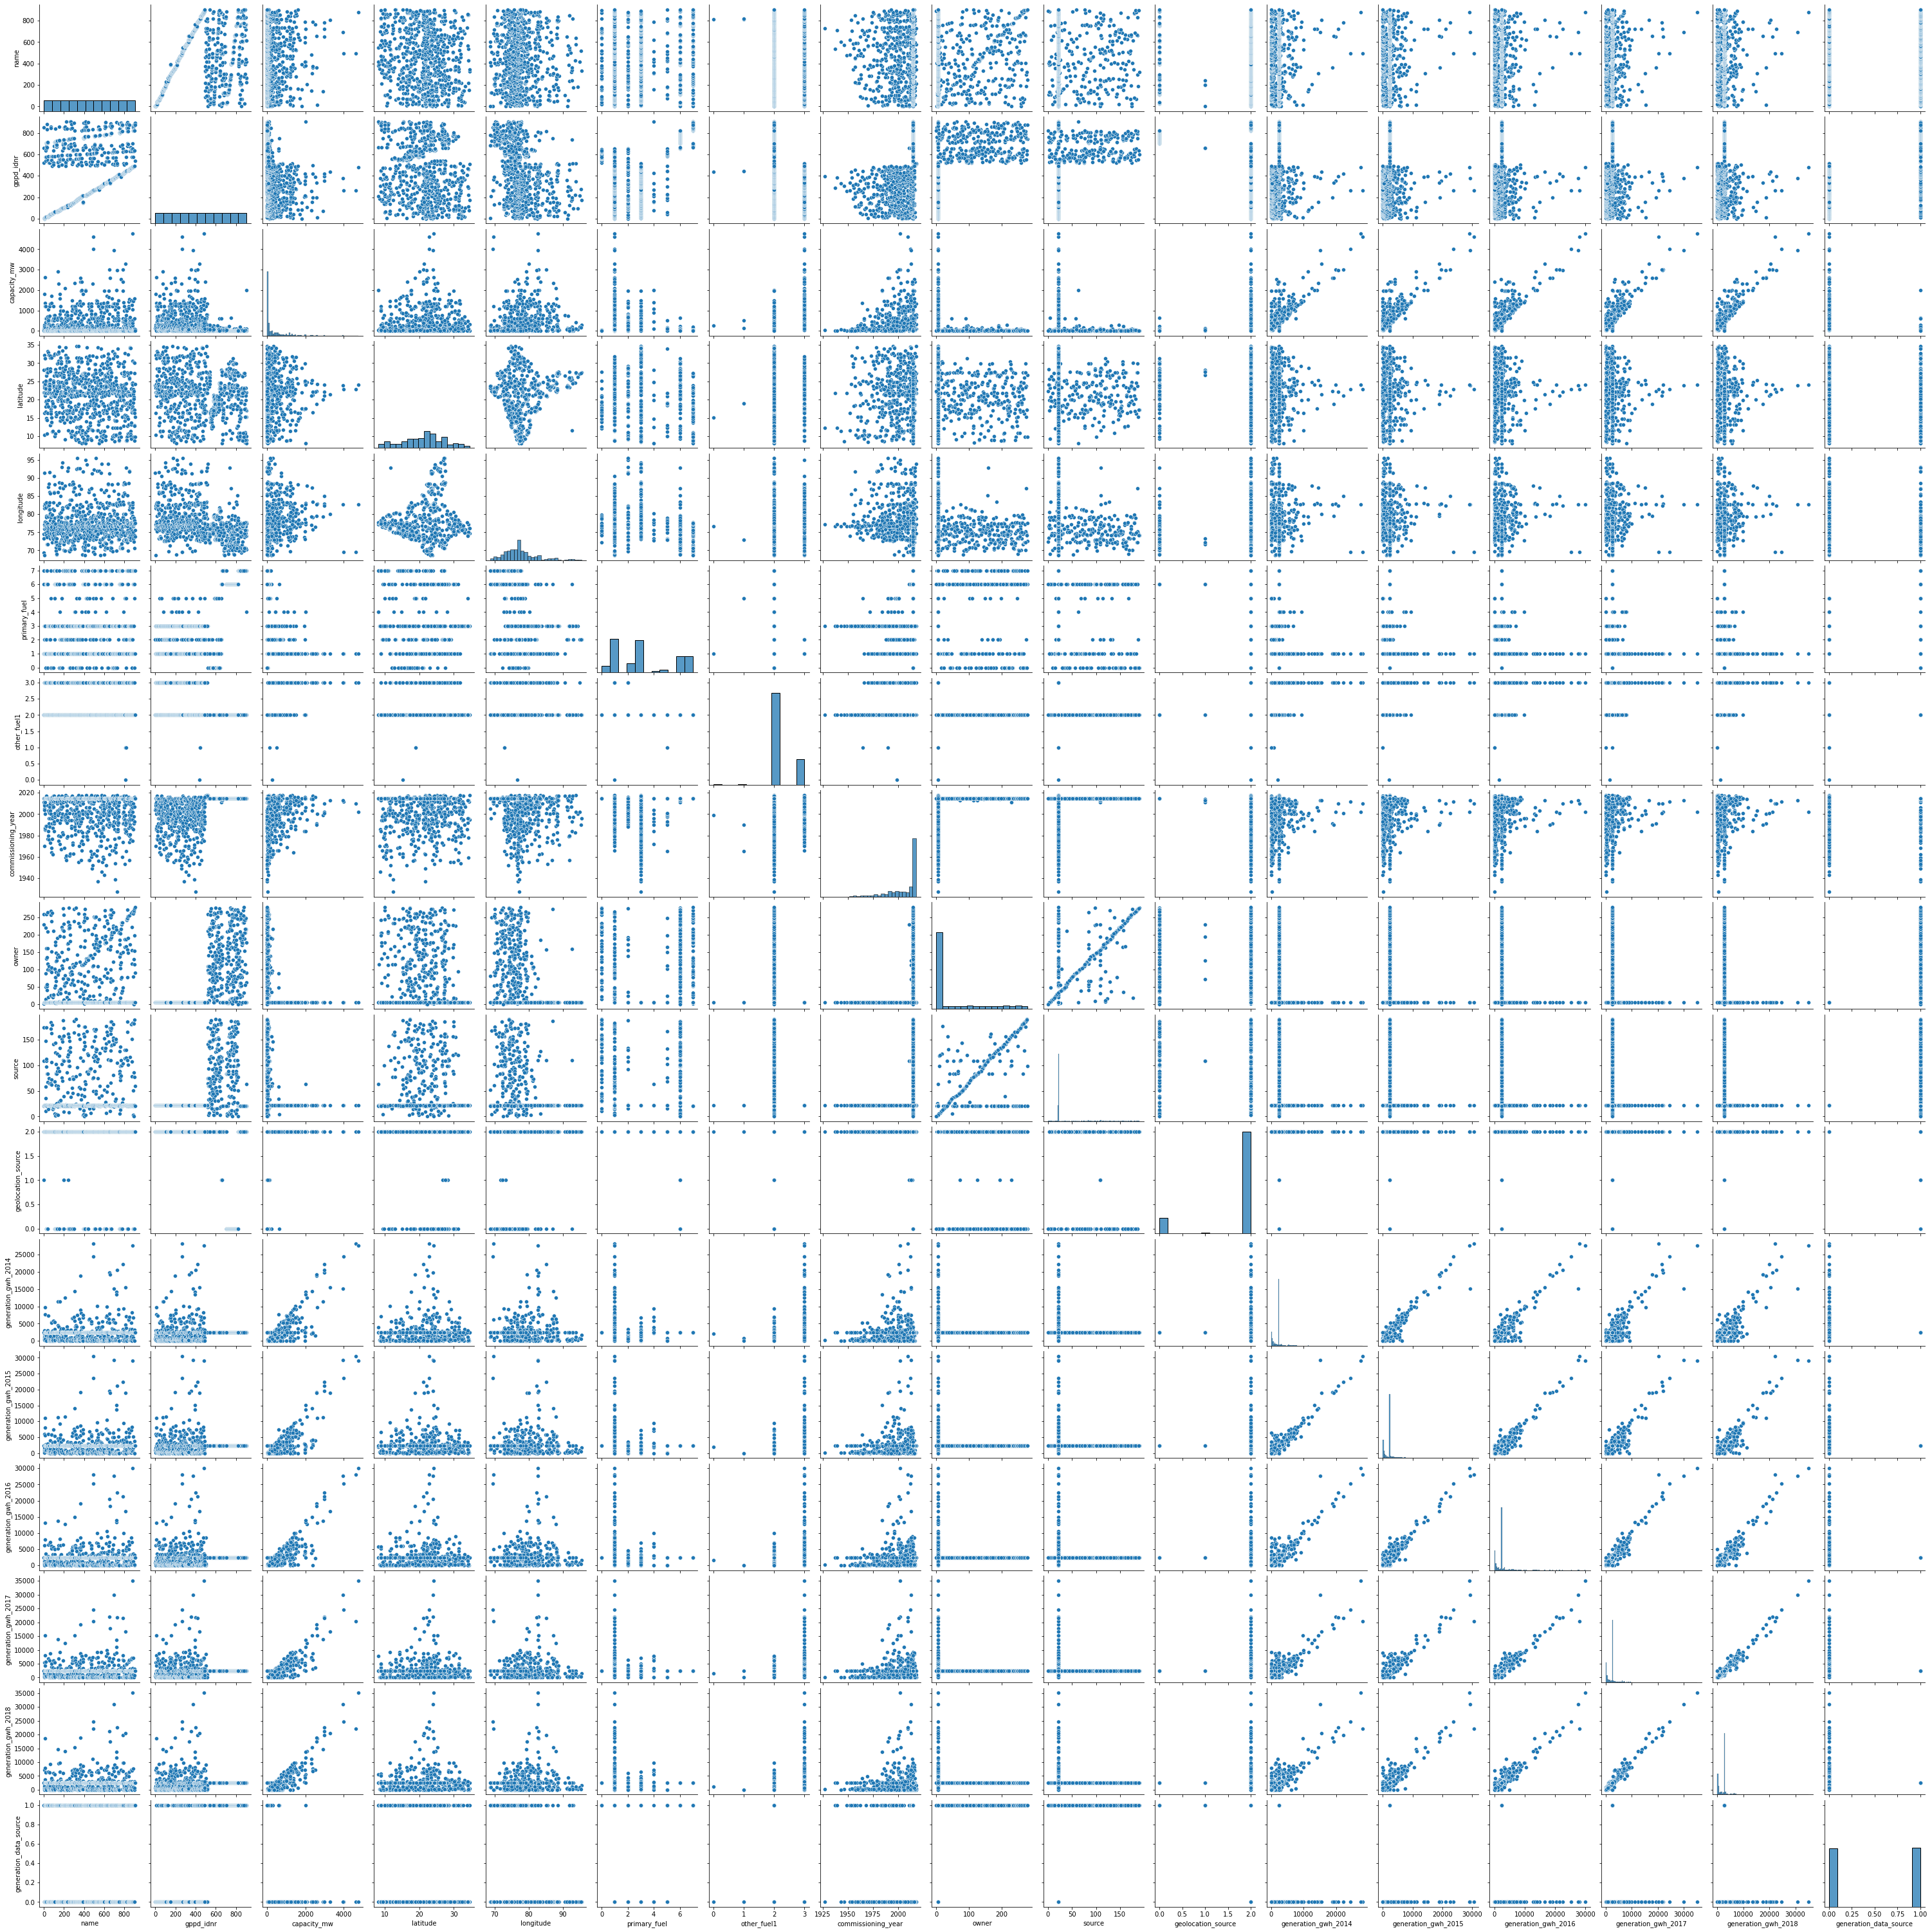

In [75]:
sns.pairplot(fuel)

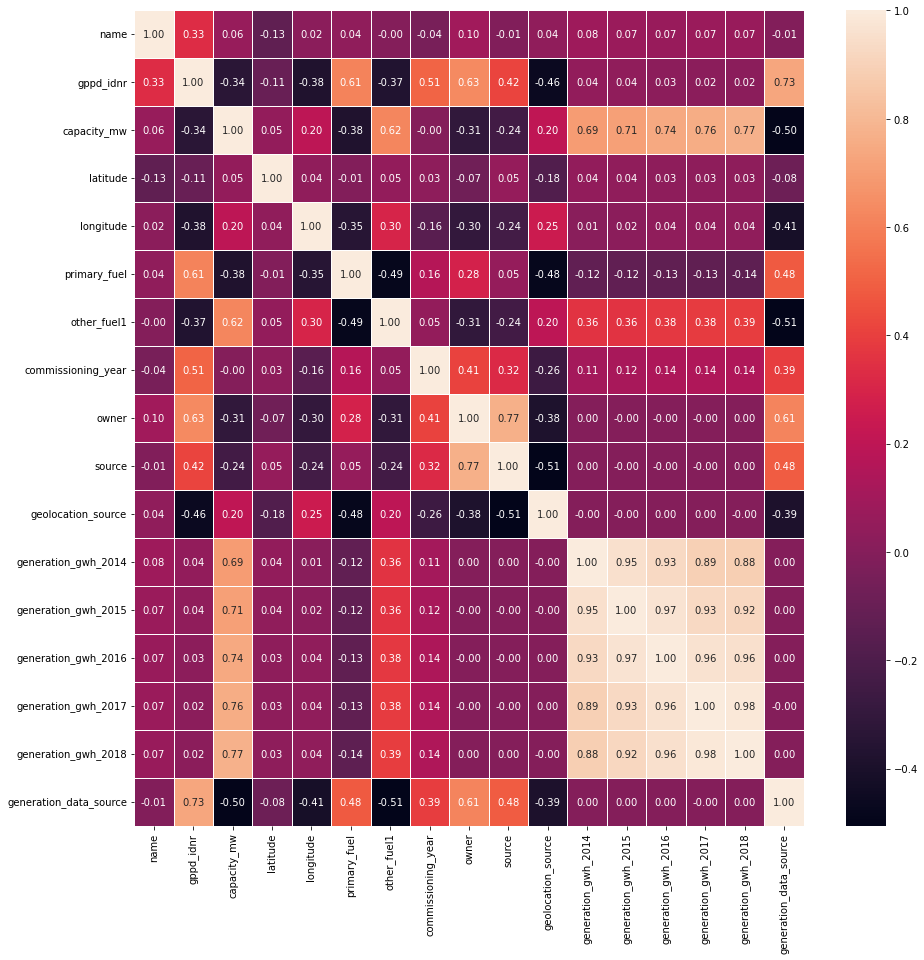

In [76]:
#heatmap for correlation
corr_hmap= fuel.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_hmap, annot=True, linewidths=0.9, linecolor="white", fmt='.2f')
plt.show()

#there is not very strong correlation of other variables with capacity_mw except the columns like generation_gwh_2014 - 2018, gppd_idnr, primary fuel
#there is multicollinearlity with the other variables - generation_gwh_2014 - 2018, so no need to check multicolinearity

In [78]:
fuel.corr()

name  gppd_idnr  capacity_mw  latitude  longitude  \
name                    1.000000   0.332205     0.060240 -0.134571   0.019222   
gppd_idnr               0.332205   1.000000    -0.335742 -0.105090  -0.378588   
capacity_mw             0.060240  -0.335742     1.000000  0.048790   0.199299   
latitude               -0.134571  -0.105090     0.048790  1.000000   0.035619   
longitude               0.019222  -0.378588     0.199299  0.035619   1.000000   
primary_fuel            0.040753   0.609180    -0.380395 -0.007538  -0.352056   
other_fuel1            -0.003771  -0.373007     0.619434  0.050875   0.299815   
commissioning_year     -0.041465   0.511350    -0.004072  0.034261  -0.158528   
owner                   0.098075   0.630589    -0.311048 -0.071516  -0.300546   
source                 -0.014640   0.416384    -0.242122  0.054324  -0.236623   
geolocation_source      0.036225  -0.464174     0.204865 -0.182319   0.249100   
generation_gwh_2014     0.083759   0.044518     0.694350  0.043764   0.012351   
generation_gwh_2015     0.073665   0.038958     0.711190  0.035742   0.019855   
generation_gwh_2016     0.066177   0.026831     0.742221  0.030551   0.040316   
generation_gwh_2017     0.073634   0.022853     0.757585  0.030310   0.041101   
generation_gwh_2018     0.066638   0.019265     0.773456  0.030438   0.039183   
generation_data_source -0.005862   0.734832    -0.495833 -0.084615  -0.413246   

                        primary_fuel  other_fuel1  commissioning_year  \
name                        0.040753    -0.003771           -0.041465   
gppd_idnr                   0.609180    -0.373007            0.511350   
capacity_mw                -0.380395     0.619434           -0.004072   
latitude                   -0.007538     0.050875            0.034261   
longitude                  -0.352056     0.299815           -0.158528   
primary_fuel                1.000000    -0.485250            0.164947   
other_fuel1                -0.485250     1.000000            0.051203   
commissioning_year          0.164947     0.051203            1.000000   
owner                       0.284296    -0.310286            0.408917   
source                      0.053613    -0.244913            0.322222   
geolocation_source         -0.483217     0.197187           -0.259929   
generation_gwh_2014        -0.124769     0.358659            0.110063   
generation_gwh_2015        -0.124828     0.355894            0.121882   
generation_gwh_2016        -0.131051     0.375955            0.141161   
generation_gwh_2017        -0.132003     0.382444            0.141343   
generation_gwh_2018        -0.136983     0.392036            0.144249   
generation_data_source      0.482339    -0.505156            0.390076   

                               owner        source  geolocation_source  \
name                    9.807492e-02 -1.463951e-02        3.622452e-02   
gppd_idnr               6.305894e-01  4.163838e-01       -4.641741e-01   
capacity_mw            -3.110481e-01 -2.421218e-01        2.048653e-01   
latitude               -7.151589e-02  5.432370e-02       -1.823192e-01   
longitude              -3.005465e-01 -2.366230e-01        2.490998e-01   
primary_fuel            2.842958e-01  5.361263e-02       -4.832168e-01   
other_fuel1            -3.102858e-01 -2.449134e-01        1.971869e-01   
commissioning_year      4.089166e-01  3.222222e-01       -2.599290e-01   
owner                   1.000000e+00  7.695825e-01       -3.848377e-01   
source                  7.695825e-01  1.000000e+00       -5.057202e-01   
geolocation_source     -3.848377e-01 -5.057202e-01        1.000000e+00   
generation_gwh_2014     1.211927e-18  1.917854e-18       -2.966463e-17   
generation_gwh_2015    -4.253175e-17 -2.160931e-17       -6.339264e-18   
generation_gwh_2016    -8.115062e-18 -4.925637e-17        2.904016e-17   
generation_gwh_2017    -7.069909e-17 -1.284552e-16        8.066490e-17   
generation_gwh_2018     4.713271e-17  1.092118e-17       -1.048582e-17

In [79]:
#making correlation matrix with 'capacity_mw'
corr_matrix=fuel.corr()
corr_matrix['capacity_mw'].sort_values(ascending=False)

#the highest correlation with the target variable is of- generation_gwh_2018 and least correlation is of commissioning_year 

capacity_mw               1.000000
generation_gwh_2018       0.773456
generation_gwh_2017       0.757585
generation_gwh_2016       0.742221
generation_gwh_2015       0.711190
generation_gwh_2014       0.694350
other_fuel1               0.619434
geolocation_source        0.204865
longitude                 0.199299
name                      0.060240
latitude                  0.048790
commissioning_year       -0.004072
source                   -0.242122
owner                    -0.311048
gppd_idnr                -0.335742
primary_fuel             -0.380395
generation_data_source   -0.495833
Name: capacity_mw, dtype: float64

In [80]:
fuel.shape

(907, 17)

name                         AxesSubplot(0.125,0.749828;0.168478x0.130172)
gppd_idnr                 AxesSubplot(0.327174,0.749828;0.168478x0.130172)
capacity_mw               AxesSubplot(0.529348,0.749828;0.168478x0.130172)
latitude                  AxesSubplot(0.731522,0.749828;0.168478x0.130172)
longitude                    AxesSubplot(0.125,0.593621;0.168478x0.130172)
primary_fuel              AxesSubplot(0.327174,0.593621;0.168478x0.130172)
other_fuel1               AxesSubplot(0.529348,0.593621;0.168478x0.130172)
commissioning_year        AxesSubplot(0.731522,0.593621;0.168478x0.130172)
owner                        AxesSubplot(0.125,0.437414;0.168478x0.130172)
source                    AxesSubplot(0.327174,0.437414;0.168478x0.130172)
geolocation_source        AxesSubplot(0.529348,0.437414;0.168478x0.130172)
generation_gwh_2014       AxesSubplot(0.731522,0.437414;0.168478x0.130172)
generation_gwh_2015          AxesSubplot(0.125,0.281207;0.168478x0.130172)
generation_gwh_2016      

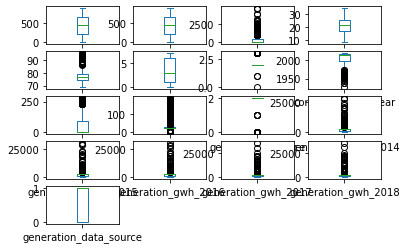

In [81]:
#checking for outliers
#plotting the plot all together
fuel.plot(kind='box', subplots=True, layout=(5,4))

In [82]:
from scipy.stats import zscore
z=np.abs(zscore(fuel))
z.shape

(907, 17)

In [83]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
       299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
       360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
       454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
       494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 601, 621,
       638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 657,
       661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721, 721,
       721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 726,
       728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808, 808,
       808, 808, 808, 811, 818, 832, 847, 848, 870, 871, 879, 880, 880,
       880, 880, 880, 880, 895, 900], dtype=int64), array([ 2, 12, 13, 14, 15,  9,  9,  2, 11, 12, 13, 14, 15,  2, 11,  4,  4,
        9,  2, 11, 12, 13, 14, 15,  7,  4,  9,  2, 11, 12, 13, 14, 15,  9,
     

In [84]:
#total number of outliers presnt are:
len(np.where(z>3)[0])

#there are total 149 outliers present

149

In [85]:
#dropping the outliers
fuel_new=fuel[(z<3).all(axis=1)]
fuel_new

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0      0.0      657.0        2.500   28.1839    73.2407             6   
1      1.0      519.0       98.000   24.7663    74.6090             1   
2      2.0      853.0       39.200   21.9038    69.3732             7   
3      3.0        0.0      135.000   23.8712    91.3602             2   
4      4.0        1.0     1800.000   21.9603    82.4091             1   
5      5.0        2.0      250.000   23.7689    68.6447             1   
6      6.0        3.0       60.000   10.4547    77.0078             3   
7      7.0        4.0      192.000   32.2258    77.2070             3   
8      8.0        5.0      290.000   16.3300    75.8863             3   
9      9.0        6.0      210.000   23.1642    81.6373             1   
10    10.0        7.0     1350.000   21.0782    77.9009             1   
11    11.0        8.0      134.000   31.2717    76.4938             3   
12    12.0        9.0     1200.000   24.2007    82.8000             1   
13    13.0       10.0       16.950   31.2412    77.8769             3   
14    14.0       11.0        9.000   21.7800    76.7195             3   
16    16.0       13.0      419.330   25.1797    76.3188             2   
17    17.0      634.0      600.000   23.0666    81.7841             1   
18    18.0       14.0     1200.000   23.0655    81.7865             1   
19    19.0      576.0       10.000   18.0845    76.1851             0   
20    20.0      577.0       17.000   19.5867    74.7061             0   
21    21.0      542.0       24.000   16.7708    74.9191             0   
22    22.0       15.0      652.000   26.6282    79.5286             2   
23    23.0       16.0      600.000   21.7438    83.2741             1   
24    24.0      578.0       46.000   19.7881    79.1518             1   
25    25.0      656.0       50.000   21.7800    76.7195             6   
26    26.0      704.0        1.000   28.3615    74.2402             6   
27    27.0      669.0       16.500   14.5751    76.3926             7   
28    28.0      705.0       50.000   14.9455    77.6870             6   
29    29.0      883.0      113.600   18.8580    73.6396             7   
30    30.0      831.0       19.800   10.7245    77.1893             7   
31    31.0      668.0       13.200   14.4791    76.3482             7   
32    32.0      706.0        5.000   27.3473    71.6917             6   
33    33.0      707.0        5.000   27.3600    71.6918             6   
34    34.0      708.0        5.000   27.3632    71.6918             6   
35    35.0      709.0        5.000   27.3661    71.6916             6   
36    36.0      710.0        5.000   27.3537    71.6917             6   
37    37.0      711.0        5.000   27.3504    71.6918             6   
38    38.0      712.0        5.000   27.3566    71.6917             6   
39    39.0       17.0      705.000   28.5060    77.3066             1   
40    40.0      543.0       28.000   16.2804    75.2250             0   
41    41.0       18.0      450.000   33.1815    75.3155             3   
42    42.0       19.0      450.000   21.7800    76.7195             3   
43    43.0       20.0      180.000   32.8063    76.1418             3   
44    44.0       21.0     1050.000   23.8285    87.4513             1   
45    45.0       23.0      600.000   21.7800    76.7195             1   
46    46.0       22.0      510.000   18.1396    82.1221             3   
47    47.0      579.0       67.500   19.8601    79.3421             1   
48    48.0      520.0       10.000   24.6929    74.6890             1   
49    49.0       24.0      300.000   22.3421    82.4305             1   
50    50.0       25.0      335.000   22.9956    88.4042             1   
51    51.0       26.0       12.000   32.1686    76.4695             3   
52    52.0       27.0      315.000   24.1917    81.2875             3   
53    53.0       28.0       30.000   24.1917    81.2875             3   
54    54.0       29.0       60.000   24.1917    81.2875         

In [86]:
print("old data frame ", fuel.shape)
print("new data frame ", fuel_new.shape)
print("total dropped rows ", fuel.shape[0]- fuel_new.shape[0])

old data frame  (907, 17)
new data frame  (834, 17)
total dropped rows  73


In [87]:
#data loss percent
loss_percent = ((907-834)/907)*100
loss_percent

#8.04 % data is removed after removing outliers

8.04851157662624

In [88]:
#checking for skewness
fuel_new.skew()

name                      0.023878
gppd_idnr                -0.050686
capacity_mw               1.953285
latitude                 -0.128178
longitude                 0.938779
primary_fuel              0.410899
other_fuel1               1.375538
commissioning_year       -1.508093
owner                     1.322094
source                    1.784584
geolocation_source       -2.104209
generation_gwh_2014       1.519967
generation_gwh_2015       1.386305
generation_gwh_2016       1.408106
generation_gwh_2017       1.275235
generation_gwh_2018       1.312202
generation_data_source   -0.072119
dtype: float64

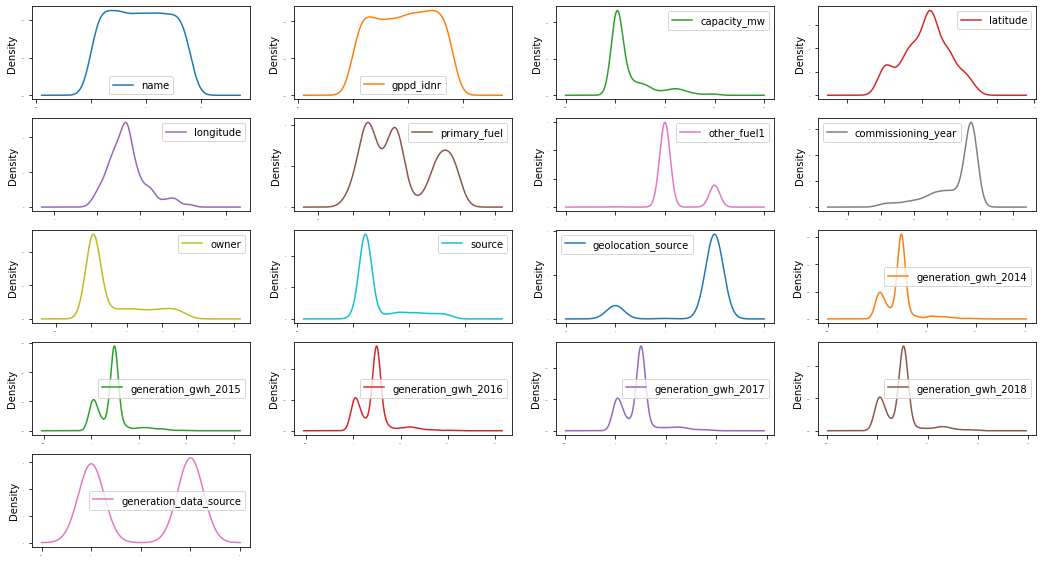

In [89]:
#show skewness using the plot
fuel_new.plot(kind='density', subplots=True, layout=(6,4), sharex= False, legend= True, fontsize=1, figsize=(18,12))
plt.show()


#the skewness is present in various columns- primary fuel, latitude, other fuel etc

In [90]:
#Separating Input & output variables
fuel_new.head()

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0   0.0      657.0          2.5   28.1839    73.2407             6   
1   1.0      519.0         98.0   24.7663    74.6090             1   
2   2.0      853.0         39.2   21.9038    69.3732             7   
3   3.0        0.0        135.0   23.8712    91.3602             2   
4   4.0        1.0       1800.0   21.9603    82.4091             1   

   other_fuel1  commissioning_year  owner  source  geolocation_source  \
0            2              2011.0    229     109                   1   
1            2              2015.0    258     174                   2   
2            2              2015.0      2      21                   2   
3            2              2004.0      5      22                   2   
4            3              2015.0      5      22                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  generation_data_source  
0          2547.759305          2600.804099                       1  
1          2547.759305          2600.804099                       1  
2          2547.759305          2600.804099                       1  
3           663.774500           626.239128                       0  
4          5385.579736          7279.000000                       0

In [91]:
#separating the data set into input & output data
#input data
x= pd.DataFrame(fuel_new, columns=['name', 'gppd_idnr', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'])
x

name  gppd_idnr  latitude  longitude  primary_fuel  other_fuel1  \
0      0.0      657.0   28.1839    73.2407             6            2   
1      1.0      519.0   24.7663    74.6090             1            2   
2      2.0      853.0   21.9038    69.3732             7            2   
3      3.0        0.0   23.8712    91.3602             2            2   
4      4.0        1.0   21.9603    82.4091             1            3   
5      5.0        2.0   23.7689    68.6447             1            3   
6      6.0        3.0   10.4547    77.0078             3            2   
7      7.0        4.0   32.2258    77.2070             3            2   
8      8.0        5.0   16.3300    75.8863             3            2   
9      9.0        6.0   23.1642    81.6373             1            3   
10    10.0        7.0   21.0782    77.9009             1            3   
11    11.0        8.0   31.2717    76.4938             3            2   
12    12.0        9.0   24.2007    82.8000             1            3   
13    13.0       10.0   31.2412    77.8769             3            2   
14    14.0       11.0   21.7800    76.7195             3            2   
16    16.0       13.0   25.1797    76.3188             2            2   
17    17.0      634.0   23.0666    81.7841             1            2   
18    18.0       14.0   23.0655    81.7865             1            3   
19    19.0      576.0   18.0845    76.1851             0            2   
20    20.0      577.0   19.5867    74.7061             0            2   
21    21.0      542.0   16.7708    74.9191             0            2   
22    22.0       15.0   26.6282    79.5286             2            2   
23    23.0       16.0   21.7438    83.2741             1            3   
24    24.0      578.0   19.7881    79.1518             1            2   
25    25.0      656.0   21.7800    76.7195             6            2   
26    26.0      704.0   28.3615    74.2402             6            2   
27    27.0      669.0   14.5751    76.3926             7            2   
28    28.0      705.0   14.9455    77.6870             6            2   
29    29.0      883.0   18.8580    73.6396             7            2   
30    30.0      831.0   10.7245    77.1893             7            2   
31    31.0      668.0   14.4791    76.3482             7            2   
32    32.0      706.0   27.3473    71.6917             6            2   
33    33.0      707.0   27.3600    71.6918             6            2   
34    34.0      708.0   27.3632    71.6918             6            2   
35    35.0      709.0   27.3661    71.6916             6            2   
36    36.0      710.0   27.3537    71.6917             6            2   
37    37.0      711.0   27.3504    71.6918             6            2   
38    38.0      712.0   27.3566    71.6917             6            2   
39    39.0       17.0   28.5060    77.3066             1            3   
40    40.0      543.0   16.2804    75.2250             0            2   
41    41.0       18.0   33.1815    75.3155             3            2   
42    42.0       19.0   21.7800    76.7195             3            2   
43    43.0       20.0   32.8063    76.1418             3            2   
44    44.0       21.0   23.8285    87.4513             1            3   
45    45.0       23.0   21.7800    76.7195             1            3   
46    46.0       22.0   18.1396    82.1221             3            2   
47    47.0      579.0   19.8601    79.3421             1            2   
48    48.0      520.0   24.6929    74.6890             1            2   
49    49.0       24.0   22.3421    82.4305             1            3   
50    50.0       25.0   22.9956    88.4042             1            3   
51    51.0       26.0   32.1686    76.4695             3            2   
52    52.0       27.0   24.1917    81.2875             3            2   
53    53.0       28.0   24.1917    81.2875             3            2   
54    54.0       29.0   24.1917    81.2875             3        

In [92]:
y= pd.DataFrame(fuel_new, columns=['capacity_mw'])
y

capacity_mw
0          2.500
1         98.000
2         39.200
3        135.000
4       1800.000
5        250.000
6         60.000
7        192.000
8        290.000
9        210.000
10      1350.000
11       134.000
12      1200.000
13        16.950
14         9.000
16       419.330
17       600.000
18      1200.000
19        10.000
20        17.000
21        24.000
22       652.000
23       600.000
24        46.000
25        50.000
26         1.000
27        16.500
28        50.000
29       113.600
30        19.800
31        13.200
32         5.000
33         5.000
34         5.000
35         5.000
36         5.000
37         5.000
38         5.000
39       705.000
40        28.000
41       450.000
42       450.000
43       180.000
44      1050.000
45       600.000
46       510.000
47        67.500
48        10.000
49       300.000
50       335.000
51        12.000
52       315.000
53        30.000
54        60.000
55        20.000
56        20.000
57      1200.000
58        42.000
59       720.000
60        90.000
61      1320.000
62        90.000
63       250.000
64       120.000
65       300.000
66        66.000
67         5.000
68        20.000
69       270.000
70        22.800
72        25.200
73        10.000
74        18.000
75      1700.000
76        26.000
77        41.000
78      1379.000
79        15.000
81        34.000
82        16.000
83        15.000
84       500.000
85        30.000
86        30.000
87        30.000
88        30.000
89       500.000
90       300.000
91        80.000
92        75.000
93      1210.000
94        10.000
95        99.000
96       500.000
97        69.600
98       600.000
99         6.000
100       20.000
101      500.000
102      210.000
103      750.000
104       40.000
105       60.000
106      165.000
107      750.000
108       70.000
109       81.500
110      600.000
111        1.000
112        1.000
113       11.200
114       15.000
115       10.000
116        5.000
117        5.000
118       20.000
119       15.000
120       36.300
121       10.000
122        1.000
123        1.700
124       24.800
125       50.400
126      150.000
127        5.000
128       98.700
129        3.000
130       40.000
131        4.200
132        1.000
133       60.000
134      300.000
135      540.000
136      231.000
137       40.000
138       35.000
139      234.000
140      120.000
141       10.000
142      630.000
144       36.000
145        3.750
146       32.800
148      240.000
149      144.000
150       44.000
151      110.000
152       24.000
153        5.000
154      221.000
155       21.000
156        5.000
157      660.000
159      829.780
160      100.000
161      100.000
162     1600.000
163       25.000
164       30.000
165       24.000
166      990.000
167     1200.000
168     1200.000
169       33.750
170       51.000
171      500.000
172      600.000
173      280.000
174      330.000
175      595.200
176       22.000
177       96.000
178        5.000
180       12.960
181       67.600
182       25.000
184       24.000
185       22.000
186      390.000
187       12.800
188      210.000
189     1000.000
190        5.000
192      125.000
193        2.000
194       37.500
195       28.200
196       25.000
197        5.000
198      125.000
199      100.000
200        1.000
201       15.000
202       22.500
203        9.000
204      515.000
205       11.200
206       68.800
207       20.000
208       75.000
210      431.586
211        4.250
212      310.000
213       39.000
214      800.000
215       35.000
216       10.500
217      225.000
218      648.000
219       15.000
220      630.000
221      115.000
223      468.570
224      120.000
225       23.100
226       22.500
227       32.000
228      250.000
229      920.000
230       30.000
231       60.000
232       23.100
233      600.000
234      205.240
235      540.000
236       25.000
237      768.000
238       55.000
239       15.000
240       25.600
241        3.000
242        5.000
243        1.000
245       50.000
246       

In [93]:
#removing the skewness
from sklearn.preprocessing import power_transform
#doing power transform
x=power_transform(x, method='yeo-johnson')
x

C:\Users\kirti\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\kirti\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


array([[-2.16509461,  0.75656863,  1.15623219, ...,  0.36758322,
         0.38243807,  0.96465308],
       [-2.14411324,  0.29974942,  0.5871654 , ...,  0.36758322,
         0.38243807,  0.96465308],
       [-2.12629638,  1.36260405,  0.11543539, ...,  0.36758322,
         0.38243807,  0.96465308],
       ...,
       [ 1.5509249 ,  1.47545062, -0.95645633, ...,  0.36758322,
         0.38243807,  0.96465308],
       [ 1.55378332,  0.36784443,  0.51826997, ...,  0.36758322,
         0.38243807,  0.96465308],
       [ 1.55664077,  1.4310664 , -1.79371529, ...,  0.36758322,
         0.38243807,  0.96465308]])

In [94]:
#performing data scaling 
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x= scale.fit_transform(x)

In [95]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
scaled=scale.fit_transform(x)
x=scaled
x

array([[0.        , 0.79065837, 0.74678712, ..., 0.492255  , 0.50496093,
        1.        ],
       [0.00563752, 0.6653327 , 0.61479776, ..., 0.492255  , 0.50496093,
        1.        ],
       [0.01042477, 0.95692063, 0.5053847 , ..., 0.492255  , 0.50496093,
        1.        ],
       ...,
       [0.99846419, 0.98787942, 0.25677011, ..., 0.492255  , 0.50496093,
        1.        ],
       [0.99923223, 0.68401417, 0.59881815, ..., 0.492255  , 0.50496093,
        1.        ],
       [1.        , 0.97570287, 0.06257626, ..., 0.492255  , 0.50496093,
        1.        ]])

In [96]:
#number of columns
x.shape[1] 

16

In [97]:
#checking the multicollieanrity
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
#finding vif for each column
def calc_vif(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF Factor']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [99]:
x.shape

(834, 16)

In [100]:
calc_vif(fuel_new)

#there is high multicolinearity in columns :
#longitude
#commissioning year
#geolocation source
#generation_gwh columns

#to remove the multicolinearity in various columns , instead of dropping the columns, we can use PCA

variables  VIF Factor
0                     name    5.767758
1                gppd_idnr   18.994332
2              capacity_mw    6.181433
3                 latitude   14.330306
4                longitude  437.091841
5             primary_fuel    8.762900
6              other_fuel1   68.730086
7       commissioning_year  607.648447
8                    owner    4.950118
9                   source    7.316592
10      geolocation_source   16.158290
11     generation_gwh_2014   16.056477
12     generation_gwh_2015   29.859540
13     generation_gwh_2016   35.178619
14     generation_gwh_2017   40.508747
15     generation_gwh_2018   40.250983
16  generation_data_source   12.174928

In [101]:
#clubbing the columns to 14 total- clubbing pair of columns with high colinearity 
from sklearn.decomposition import PCA
pca= PCA(n_components= 14)
xpca=pca.fit_transform(x)
x=xpca

In [102]:
x=pd.DataFrame(x)
x.shape

(834, 14)

In [103]:
y.shape

(834, 1)

# Keeping Capacity_mw as the target- Regression Model

# Modelling - Linear Regression

In [104]:
#importing the libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [105]:
lm=LinearRegression()

In [106]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.22, random_state=45)

In [107]:
x_train.shape

(650, 14)

In [108]:
x_test.shape

(184, 14)

In [109]:
y_train.shape

(650, 1)

In [110]:
y_test.shape

(184, 1)

In [111]:
lm.fit(x_train, y_train) 

LinearRegression()

In [112]:
lm.coef_

array([[ 265.80263503,  643.77588118,  427.50439182, -450.16748257,
          20.60647752,  -22.13810675, -422.65035082,  261.0061852 ,
         219.94059444, -426.71241134,  134.18529374, -357.1922306 ,
         187.04255117,  101.39596008]])

In [113]:
lm.intercept_

array([269.03599977])

In [114]:
lm.score(x_train, y_train)

#accuracy of model is 78.56%

0.7856794060113971

In [115]:
predlm=lm.predict(x_test)

In [116]:
print("predicted wins:", predlm)
print("actual wins: ", y_test)

predicted wins: [[ 2.15267085e+01]
 [ 1.26119389e+03]
 [ 1.47986393e+01]
 [ 1.26620056e+03]
 [ 1.01214224e+02]
 [ 6.84284360e+02]
 [ 2.70689379e+01]
 [ 1.23415733e+02]
 [ 3.16504450e+01]
 [ 3.83431417e+01]
 [ 6.51777795e+01]
 [ 1.81283867e+01]
 [ 6.60868421e+02]
 [ 1.84099418e+01]
 [ 7.22447289e+01]
 [ 3.07186803e+02]
 [ 2.12515024e+02]
 [ 5.14456142e+02]
 [-3.90493801e+01]
 [ 2.88755860e+02]
 [ 9.56203938e+01]
 [ 2.95964771e+01]
 [ 2.20530999e+02]
 [ 1.29448809e+01]
 [ 5.94314419e+01]
 [ 1.10747820e+02]
 [ 9.17580501e+00]
 [ 8.84938127e+01]
 [ 6.89155162e+01]
 [ 1.40605824e+03]
 [ 2.11771206e+02]
 [ 1.49701110e+01]
 [ 4.43780437e+01]
 [ 6.43210537e+01]
 [ 1.41672336e+03]
 [-9.87261689e+01]
 [ 8.21910298e+01]
 [ 7.85742796e+02]
 [ 6.16928245e+02]
 [ 1.07896201e+02]
 [ 4.47824596e+01]
 [ 5.91762843e+01]
 [ 6.09700159e+02]
 [ 5.88071717e+01]
 [-1.56769307e+01]
 [ 1.11823997e+02]
 [ 5.87624188e+01]
 [ 3.19439252e+02]
 [ 6.54206479e+02]
 [ 2.89980145e+02]
 [ 1.00138038e+02]
 [-1.60750807e+

In [117]:
print('The Error:')
print("mean absolute error:", mean_absolute_error(y_test,predlm))
print("mean squared error:", mean_squared_error(y_test,predlm))
print("root mean square error:", np.sqrt(mean_squared_error(y_test,predlm)))

The Error:
mean absolute error: 125.41858981446825
mean squared error: 57436.65093479403
root mean square error: 239.65944783128003


In [118]:
fuel_new.head()

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0   0.0      657.0          2.5   28.1839    73.2407             6   
1   1.0      519.0         98.0   24.7663    74.6090             1   
2   2.0      853.0         39.2   21.9038    69.3732             7   
3   3.0        0.0        135.0   23.8712    91.3602             2   
4   4.0        1.0       1800.0   21.9603    82.4091             1   

   other_fuel1  commissioning_year  owner  source  geolocation_source  \
0            2              2011.0    229     109                   1   
1            2              2015.0    258     174                   2   
2            2              2015.0      2      21                   2   
3            2              2004.0      5      22                   2   
4            3              2015.0      5      22                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  generation_data_source  
0          2547.759305          2600.804099                       1  
1          2547.759305          2600.804099                       1  
2          2547.759305          2600.804099                       1  
3           663.774500           626.239128                       0  
4          5385.579736          7279.000000                       0

In [125]:
#predict 'capacity_mw' by giving inputs- 

t= np.array([1, 12, 48, 34, 57.89, 7, 2, 200, 103, 67, 2, 100, 200, 566])

In [126]:
t.shape

(14,)

In [127]:
t=t.reshape(1,-1)

In [128]:
t.shape

(1, 14)

In [129]:
lm.predict(t)
#The predicted value of 'capacity_mw' for the given set of input values is as follows.

array([[119280.46501998]])

In [130]:
#using K fold cross validation
from sklearn.model_selection import cross_val_score
score= cross_val_score(lm, x, y, cv=5)
print(score.mean())


#cross validating to check the accuracy- 75.12%

0.7512367621010649


# Model Lasso- L1

In [131]:
#create and fit a Lasso regression model
model= Lasso()

In [168]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state= 45)

In [169]:
#prepare a range of alpha values to test
alphavalue= {'alpha':[1, 0.1, 0.01, 0.001, 0.0001, 0]}

In [170]:
grid= GridSearchCV(estimator= model, param_grid=alphavalue)
grid.fit(x_train, y_train)
print(grid)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


C:\Users\kirti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8558892.992911395, tolerance: 7688.486835553665
  model = cd_fast.enet_coordinate_descent(
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


In [171]:
#summarize results of grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

#best value of alpha=1

0.7573506974283741
1
{'alpha': 1}


In [172]:
#using Lasso
ls= Lasso(alpha=1) 
#Keeping the best value of alpha = 1

ls.fit(x_train, y_train)

Lasso(alpha=1)

In [173]:
ls.coef_

array([ 263.48023967,  628.58161531,  421.79142933, -432.97608623,
          5.94061552,   -0.        , -380.43493101,  217.45931848,
        150.21333444, -387.38506558,   83.18313567, -169.58121946,
          0.        ,    0.        ])

In [174]:
ls.intercept_

array([267.83326338])

In [175]:
ls.score(x_train, y_train)

#the accuracy is 77.68

0.7768623629728775

In [176]:
predls= ls.predict(x_test)

In [177]:
print("predicted wins:", predls)
print("actual wins: ", y_test)

predicted wins: [ 2.28932265e+01  1.22460219e+03  2.08178182e+01  1.24146783e+03
  1.06481595e+02  7.08200990e+02  3.55009453e+01  1.22223508e+02
  2.48624417e+01  1.61422606e+01  3.84131893e+01  1.65237374e+01
  5.92784885e+02  1.37170584e+01  6.41296598e+01  3.40155575e+02
  2.31912252e+02  5.34537094e+02 -1.87281100e+01  2.93928595e+02
  1.00641258e+02  3.38319712e+01  2.23137508e+02  1.05685112e+01
  5.12369310e+01  1.07995353e+02  2.75272998e+00  8.66075320e+01
  6.40462954e+01  1.35042251e+03  1.95138720e+02  2.23743522e+01
  1.30983821e+01  6.87418157e+01  1.38662705e+03 -6.54693368e+01
  1.15296817e+02  7.64762993e+02  6.16689573e+02  1.02283568e+02
  3.61249482e+01  7.10536165e+01  6.05782288e+02  3.15773809e+01
  5.82716496e+00  1.13492936e+02  4.37069051e+01  3.41040889e+02
  6.12431083e+02  2.73040397e+02  8.16061164e+01 -6.69949246e+00
 -1.95716437e+01  4.51279435e+01  9.04813515e+01  1.03983420e+03
  2.00692179e+02  7.57000503e+01  5.22765146e+01 -1.11929491e+01
 -5.72275

In [178]:
#predict 'capacity_mw' by giving inputs- 
t= np.array([1, 12, 48, 34, 57.89, 7, 2, 200, 103, 67, 2, 100, 200, 566])

In [179]:
t=t.reshape(1,-1)

In [180]:
ls.predict(t)
#The predicted value of 'capacity_mw' for the given set of input values is as follows.

array([29399.40900803])

In [181]:
#using K fold cross validation
from sklearn.model_selection import cross_val_score
score= cross_val_score(ls, x, y, cv=5)
print(score.mean())


#cross validating to check the accuracy- 75.24%

0.7524566447586001


# Model -Ridge

In [191]:
#create and fit a ridge regression model
model= Ridge()

In [200]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state=45)

In [201]:
#prepare a range of alpha values to test
alphavalue= {'alpha':[1, 0.1, 0.01, 0.001, 0.0001, 0]}

In [202]:
#summarize results of grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

#best value of alpha = 1

0.7573506974283741
1
{'alpha': 1}


In [203]:
#creating model
#Using Ridge
rd= Ridge(alpha= 1) #keeping the best value of alpha= 1
rd.fit(x_train, y_train)

Ridge(alpha=1)

In [204]:
rd.coef_

array([[ 263.83982521,  630.58830934,  424.01973811, -435.82567495,
          21.800781  ,   -8.07534927, -391.57095864,  237.91301328,
         194.24663028, -416.74600592,  162.32788169, -271.87955576,
         126.89503811,   76.64081007]])

In [205]:
rd.intercept_

array([267.68266099])

In [206]:
rd.score(x_train, y_train)

#accuracy = 78.02

0.7802792816217028

In [207]:
predrd=rd.predict(x_test)

In [208]:
print("predicted wins:", predrd)
print("actual wins: ", y_test)

predicted wins: [[ 2.05145370e+01]
 [ 1.22788663e+03]
 [ 2.62964645e+01]
 [ 1.24729628e+03]
 [ 9.49396938e+01]
 [ 6.96207267e+02]
 [ 2.71004148e+01]
 [ 1.17474138e+02]
 [ 2.15332797e+01]
 [ 3.80372529e+01]
 [ 5.70470537e+01]
 [ 2.09890628e+01]
 [ 6.25211937e+02]
 [ 1.87220219e+01]
 [ 6.94574362e+01]
 [ 3.25118283e+02]
 [ 2.29022445e+02]
 [ 5.19237352e+02]
 [-2.78941202e+01]
 [ 2.89762885e+02]
 [ 9.58843705e+01]
 [ 2.72965260e+01]
 [ 2.28593623e+02]
 [ 1.30145389e+01]
 [ 4.52365289e+01]
 [ 1.06484472e+02]
 [ 1.37293847e+01]
 [ 8.75078096e+01]
 [ 6.02088038e+01]
 [ 1.36832727e+03]
 [ 2.10492186e+02]
 [ 2.05367826e+01]
 [ 3.90751374e+01]
 [ 5.95451043e+01]
 [ 1.39357322e+03]
 [-7.51321211e+01]
 [ 1.07733622e+02]
 [ 7.74846521e+02]
 [ 6.17283427e+02]
 [ 1.11014971e+02]
 [ 3.87165822e+01]
 [ 6.33211201e+01]
 [ 6.11080690e+02]
 [ 4.97544737e+01]
 [-1.27646078e+01]
 [ 1.09010140e+02]
 [ 4.97671664e+01]
 [ 3.23176509e+02]
 [ 6.31562522e+02]
 [ 2.80861364e+02]
 [ 9.18813010e+01]
 [-8.14278457e+

In [209]:
#predict 'capacity_mw' by giving inputs- 
t= np.array([1, 12, 48, 34, 57.89, 7, 2, 200, 103, 67, 2, 100, 200, 566])

In [210]:
t=t.reshape(1,-1)
ls.predict(t)
#The predicted value of 'capacity_mw' for the given set of input values is as follows.

array([29399.40900803])

In [211]:
#using K fold cross validation
from sklearn.model_selection import cross_val_score
score= cross_val_score(rd, x, y, cv=5)
print(score.mean())


#cross validating to check the accuracy- 75.43%

0.7543598693957959


# Model Elastic Net

In [213]:
from sklearn.linear_model import ElasticNet

In [214]:
model= ElasticNet()

In [215]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state=45)

In [216]:
#prepare a range of alpha values to test
alphavalue= {'alpha':[1, 0.1, 0.01, 0.001, 0.0001, 0]}

In [217]:
grid= GridSearchCV(estimator= model, param_grid=alphavalue)
grid.fit(x_train, y_train)
print(grid)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


C:\Users\kirti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8558892.992911395, tolerance: 7688.486835553665
  model = cd_fast.enet_coordinate_descent(
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


In [226]:
#summarize results of grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

#best value of alpha =0.01

0.7579943223748438
0.01
{'alpha': 0.01}


In [227]:
enr=ElasticNet(alpha=0.01)
enr.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [228]:
enr.intercept_

array([268.08940353])

In [229]:
enr.coef_

array([ 262.95971697,  615.35357137,  410.22190184, -418.63635076,
         20.00387494,   -6.06409954, -362.39515055,  212.49904295,
        159.96505516, -335.71435299,  122.05555434, -182.50058708,
         79.87240717,   45.91173176])

In [230]:
enr.score(x_train, y_train)

#the accuracy is 77.63%

0.7763728422472173

In [231]:
predenr=enr.predict(x_test)

In [232]:
print("predicted wins:", predenr)
print("actual wins: ", y_test)

predicted wins: [ 1.91108520e+01  1.20212819e+03  3.63781763e+01  1.22985890e+03
  9.60324414e+01  7.01286331e+02  2.57012779e+01  1.21853304e+02
  2.01629126e+01  3.46168448e+01  5.42529905e+01  3.52005099e+01
  5.85803993e+02  1.29635045e+01  6.90628803e+01  3.41332831e+02
  2.37423702e+02  5.34490088e+02 -2.28947852e+01  2.95521529e+02
  1.03247708e+02  2.67295185e+01  2.33776977e+02  2.92876290e+01
  4.43892745e+01  1.10318858e+02  8.99189713e+00  9.19396161e+01
  5.50034716e+01  1.33465140e+03  2.09991519e+02  3.80950519e+01
  3.42699404e+01  5.73074210e+01  1.36832148e+03 -4.69775606e+01
  1.24090590e+02  7.56679284e+02  5.98154219e+02  1.12919422e+02
  3.06837343e+01  6.98055463e+01  5.94893878e+02  5.50136825e+01
 -2.43391902e+00  1.14009059e+02  6.11493473e+01  3.24299554e+02
  6.16409450e+02  2.75002737e+02  8.87992210e+01  1.12313935e+01
 -1.25714946e+01  5.10008935e+01  8.96797835e+01  1.02688017e+03
  2.05984373e+02  8.41039469e+01  7.74435281e+01 -1.61541027e+01
 -1.48982

In [236]:
#predict 'capacity_mw' by giving inputs- 
t= np.array([1, 12, 48, 34, 57.89, 7, 2, 200, 103, 67, 2, 100, 200, 100])

In [237]:
t=t.reshape(1,-1)
enr.predict(t)
#The predicted value of 'capacity_mw' for the given set of input values is as follows.

array([52806.14729298])

In [238]:
#using K fold cross validation
from sklearn.model_selection import cross_val_score
score= cross_val_score(enr, x, y, cv=5)
print(score.mean())


#cross validating to check the accuracy- 75.59%

0.7559825005049225


# SVR

In [260]:
from sklearn.svm import SVR

In [261]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.33, random_state= 42)

In [269]:
from sklearn import svm
parameters= {'kernel': ['linear', 'rbf', 'poly'], 'C':[1,10]}
svc= svm.SVR()
clf= GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)

C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})

In [270]:
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [271]:
#Using the model
svr= SVR(kernel = 'linear', C=10 )
svr.fit(x_train, y_train)
print(svr.score(x_train, y_train))

#the model accuracy is 60.17%

0.6017419244467361


C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [272]:
#Also checking with other parameters
svrp= SVR(kernel = 'poly', C=10 )
svrp.fit(x_train, y_train)
print(svrp.score(x_train, y_train))

#the model accuracy is  48.07%  for poly 

0.48076684954924087


C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [273]:
svrr= SVR(kernel = 'rbf', C=10 )
svrr.fit(x_train, y_train)
print(svrr.score(x_train, y_train))

#model with rbf has 40.78% accuracy

C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.40780394356651317


In [274]:
predsvr=svr.predict(x_test)

In [275]:
print("predicted wins:", predsvr)
print("actual wins: ", y_test)

predicted wins: [180.35321478  26.74218679  33.54948783 178.88293813 163.88133797
  29.61820605  36.69466497 606.17542008 264.08680621  43.35971046
 127.71985108  29.76707509 172.88865478  44.63675447  26.52300387
  10.7278473  137.97324219 529.63554989 760.98694355   7.15701403
 536.21905363  65.37990368 545.73988748 352.10011602  13.82199075
 272.19977363  22.90909217  18.58388616  33.78719704 735.45529781
 353.9599271   38.61745059 665.06246644 381.11238403  32.7606111
  12.6639349   32.1944811   32.04745558  11.11605922 153.45700935
  41.29853925  86.91218052  25.50258365 252.65691712 770.86896435
  11.21045511 179.98328285  15.1691183   13.5608517   29.69439948
 194.98331073  37.88161311  28.82829247  34.54847569  26.58962665
 600.18848111 272.84973102 778.49258842  81.93618211  36.22278252
   7.96643857   8.63943207  12.41895449  29.62919171 208.50974641
 417.87820822  42.97548042  15.29194175  34.83141714 854.69703753
 349.21474017 362.00835814  87.56393258 146.70101364  86.2160

In [276]:
#predict 'capacity_mw' by giving inputs- 
t= np.array([1, 12, 48, 34, 57.89, 7, 802, 200, 103, 67, 2, 100, 200, 10])

In [277]:
t=t.reshape(1,-1)
svr.predict(t)
#The predicted value of 'capacity_mw' for the given set of input values is as follows.

array([-156152.74729051])

In [278]:
#using K fold cross validation
from sklearn.model_selection import cross_val_score
score= cross_val_score(svr, x, y, cv=5)
print(score.mean())


#cross validating to check the accuracy- 63.39%

0.6339308738745972


C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

# Conclusion

# Saving The model

In [281]:
#saving Data Frame- linear regression
project_global_linear=pd.DataFrame(predlm)
project_global_linear.to_csv("project_global_linear.csv")

In [282]:
#saving model
import pickle

file_global_linear = 'project_global_linear.pkl'
pickle.dump(lm, open(file_global_linear, 'wb'))

In [283]:
#load model from disk
model_global_linear = pickle.load(open(file_global_linear, 'rb'))

In [284]:
#model prediction

result_global_linear = model_global_linear.score(x_test, y_test)
print(result_global_linear)


#we can check that the model is predicting with upto 77.49% accuracy

0.7749586657596208


# Classification Model- Primary Fuel

In [285]:
fuel_new

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0      0.0      657.0        2.500   28.1839    73.2407             6   
1      1.0      519.0       98.000   24.7663    74.6090             1   
2      2.0      853.0       39.200   21.9038    69.3732             7   
3      3.0        0.0      135.000   23.8712    91.3602             2   
4      4.0        1.0     1800.000   21.9603    82.4091             1   
5      5.0        2.0      250.000   23.7689    68.6447             1   
6      6.0        3.0       60.000   10.4547    77.0078             3   
7      7.0        4.0      192.000   32.2258    77.2070             3   
8      8.0        5.0      290.000   16.3300    75.8863             3   
9      9.0        6.0      210.000   23.1642    81.6373             1   
10    10.0        7.0     1350.000   21.0782    77.9009             1   
11    11.0        8.0      134.000   31.2717    76.4938             3   
12    12.0        9.0     1200.000   24.2007    82.8000             1   
13    13.0       10.0       16.950   31.2412    77.8769             3   
14    14.0       11.0        9.000   21.7800    76.7195             3   
16    16.0       13.0      419.330   25.1797    76.3188             2   
17    17.0      634.0      600.000   23.0666    81.7841             1   
18    18.0       14.0     1200.000   23.0655    81.7865             1   
19    19.0      576.0       10.000   18.0845    76.1851             0   
20    20.0      577.0       17.000   19.5867    74.7061             0   
21    21.0      542.0       24.000   16.7708    74.9191             0   
22    22.0       15.0      652.000   26.6282    79.5286             2   
23    23.0       16.0      600.000   21.7438    83.2741             1   
24    24.0      578.0       46.000   19.7881    79.1518             1   
25    25.0      656.0       50.000   21.7800    76.7195             6   
26    26.0      704.0        1.000   28.3615    74.2402             6   
27    27.0      669.0       16.500   14.5751    76.3926             7   
28    28.0      705.0       50.000   14.9455    77.6870             6   
29    29.0      883.0      113.600   18.8580    73.6396             7   
30    30.0      831.0       19.800   10.7245    77.1893             7   
31    31.0      668.0       13.200   14.4791    76.3482             7   
32    32.0      706.0        5.000   27.3473    71.6917             6   
33    33.0      707.0        5.000   27.3600    71.6918             6   
34    34.0      708.0        5.000   27.3632    71.6918             6   
35    35.0      709.0        5.000   27.3661    71.6916             6   
36    36.0      710.0        5.000   27.3537    71.6917             6   
37    37.0      711.0        5.000   27.3504    71.6918             6   
38    38.0      712.0        5.000   27.3566    71.6917             6   
39    39.0       17.0      705.000   28.5060    77.3066             1   
40    40.0      543.0       28.000   16.2804    75.2250             0   
41    41.0       18.0      450.000   33.1815    75.3155             3   
42    42.0       19.0      450.000   21.7800    76.7195             3   
43    43.0       20.0      180.000   32.8063    76.1418             3   
44    44.0       21.0     1050.000   23.8285    87.4513             1   
45    45.0       23.0      600.000   21.7800    76.7195             1   
46    46.0       22.0      510.000   18.1396    82.1221             3   
47    47.0      579.0       67.500   19.8601    79.3421             1   
48    48.0      520.0       10.000   24.6929    74.6890             1   
49    49.0       24.0      300.000   22.3421    82.4305             1   
50    50.0       25.0      335.000   22.9956    88.4042             1   
51    51.0       26.0       12.000   32.1686    76.4695             3   
52    52.0       27.0      315.000   24.1917    81.2875             3   
53    53.0       28.0       30.000   24.1917    81.2875             3   
54    54.0       29.0       60.000   24.1917    81.2875         

In [286]:
#separating the data set into input & output data
#input data
x= pd.DataFrame(fuel_new, columns=['name', 'gppd_idnr', 'latitude', 'longitude', 'capacity_mw', 'other_fuel1', 'commissioning_year', 'owner', 'source', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'])
x

name  gppd_idnr  latitude  longitude  capacity_mw  other_fuel1  \
0      0.0      657.0   28.1839    73.2407        2.500            2   
1      1.0      519.0   24.7663    74.6090       98.000            2   
2      2.0      853.0   21.9038    69.3732       39.200            2   
3      3.0        0.0   23.8712    91.3602      135.000            2   
4      4.0        1.0   21.9603    82.4091     1800.000            3   
5      5.0        2.0   23.7689    68.6447      250.000            3   
6      6.0        3.0   10.4547    77.0078       60.000            2   
7      7.0        4.0   32.2258    77.2070      192.000            2   
8      8.0        5.0   16.3300    75.8863      290.000            2   
9      9.0        6.0   23.1642    81.6373      210.000            3   
10    10.0        7.0   21.0782    77.9009     1350.000            3   
11    11.0        8.0   31.2717    76.4938      134.000            2   
12    12.0        9.0   24.2007    82.8000     1200.000            3   
13    13.0       10.0   31.2412    77.8769       16.950            2   
14    14.0       11.0   21.7800    76.7195        9.000            2   
16    16.0       13.0   25.1797    76.3188      419.330            2   
17    17.0      634.0   23.0666    81.7841      600.000            2   
18    18.0       14.0   23.0655    81.7865     1200.000            3   
19    19.0      576.0   18.0845    76.1851       10.000            2   
20    20.0      577.0   19.5867    74.7061       17.000            2   
21    21.0      542.0   16.7708    74.9191       24.000            2   
22    22.0       15.0   26.6282    79.5286      652.000            2   
23    23.0       16.0   21.7438    83.2741      600.000            3   
24    24.0      578.0   19.7881    79.1518       46.000            2   
25    25.0      656.0   21.7800    76.7195       50.000            2   
26    26.0      704.0   28.3615    74.2402        1.000            2   
27    27.0      669.0   14.5751    76.3926       16.500            2   
28    28.0      705.0   14.9455    77.6870       50.000            2   
29    29.0      883.0   18.8580    73.6396      113.600            2   
30    30.0      831.0   10.7245    77.1893       19.800            2   
31    31.0      668.0   14.4791    76.3482       13.200            2   
32    32.0      706.0   27.3473    71.6917        5.000            2   
33    33.0      707.0   27.3600    71.6918        5.000            2   
34    34.0      708.0   27.3632    71.6918        5.000            2   
35    35.0      709.0   27.3661    71.6916        5.000            2   
36    36.0      710.0   27.3537    71.6917        5.000            2   
37    37.0      711.0   27.3504    71.6918        5.000            2   
38    38.0      712.0   27.3566    71.6917        5.000            2   
39    39.0       17.0   28.5060    77.3066      705.000            3   
40    40.0      543.0   16.2804    75.2250       28.000            2   
41    41.0       18.0   33.1815    75.3155      450.000            2   
42    42.0       19.0   21.7800    76.7195      450.000            2   
43    43.0       20.0   32.8063    76.1418      180.000            2   
44    44.0       21.0   23.8285    87.4513     1050.000            3   
45    45.0       23.0   21.7800    76.7195      600.000            3   
46    46.0       22.0   18.1396    82.1221      510.000            2   
47    47.0      579.0   19.8601    79.3421       67.500            2   
48    48.0      520.0   24.6929    74.6890       10.000            2   
49    49.0       24.0   22.3421    82.4305      300.000            3   
50    50.0       25.0   22.9956    88.4042      335.000            3   
51    51.0       26.0   32.1686    76.4695       12.000            2   
52    52.0       27.0   24.1917    81.2875      315.000            2   
53    53.0       28.0   24.1917    81.2875       30.000            2   
54    54.0       29.0   24.1917    81.2875       60.000            2   
55    55.0       30.0   24.2230    81.2747    

In [287]:
#target 
y= pd.DataFrame(fuel_new, columns=['primary_fuel'])
y

primary_fuel
0               6
1               1
2               7
3               2
4               1
5               1
6               3
7               3
8               3
9               1
10              1
11              3
12              1
13              3
14              3
16              2
17              1
18              1
19              0
20              0
21              0
22              2
23              1
24              1
25              6
26              6
27              7
28              6
29              7
30              7
31              7
32              6
33              6
34              6
35              6
36              6
37              6
38              6
39              1
40              0
41              3
42              3
43              3
44              1
45              1
46              3
47              1
48              1
49              1
50              1
51              3
52              3
53              3
54              3
55              3
56              1
57              1
58              2
59              1
60              3
61              1
62              1
63              1
64              2
65              3
66              3
67              7
68              7
69              1
70              0
72              5
73              1
74              1
75              1
76              3
77              1
78              3
79              1
81              3
82              3
83              3
84              1
85              3
86              3
87              3
88              1
89              1
90              3
91              3
92              3
93              1
94              0
95              1
96              1
97              1
98              1
99              3
100             3
101             1
102             1
103             1
104             7
105             5
106             2
107             1
108             3
109             5
110             1
111             6
112             6
113             7
114             6
115             6
116             6
117             6
118             6
119             6
120             6
121             6
122             7
123             7
124             7
125             7
126             7
127             6
128             7
129             6
130             6
131             6
132             6
133             1
134             3
135             3
136             3
137             1
138             1
139             1
140             1
141             1
142             1
144             3
145             3
146             3
148             3
149             3
150             3
151             3
152             0
153             6
154             6
155             7
156             6
157             1
159             2
160             4
161             1
162             1
163             1
164             0
165             0
166             3
167             1
168             2
169             3
170             3
171             1
172             1
173             3
174             2
175             2
176             5
177             3
178             3
180             0
181             5
182             3
184             3
185             0
186             3
187             1
188             1
189             1
190             6
192             7
193             6
194             7
195             6
196             6
197             6
198             6
199             6
200             6
201             3
202             3
203             7
204             2
205             7
206             7
207             7
208             7
210             2
211             7
212             2
213             7
214             1
215             2
216             3
217             2
218             2
219             3
220             1
221             3
223             2
224             1
225             7
226             3
227             3
228             3
229             1
230             1
231             3
232      

In [288]:
#removing the skewness
from sklearn.preprocessing import power_transform
#doing power transform
x=power_transform(x, method='yeo-johnson')
x

C:\Users\kirti\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\kirti\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


array([[-2.16509461,  0.75656863,  1.15623219, ...,  0.36758322,
         0.38243807,  0.96465308],
       [-2.14411324,  0.29974942,  0.5871654 , ...,  0.36758322,
         0.38243807,  0.96465308],
       [-2.12629638,  1.36260405,  0.11543539, ...,  0.36758322,
         0.38243807,  0.96465308],
       ...,
       [ 1.5509249 ,  1.47545062, -0.95645633, ...,  0.36758322,
         0.38243807,  0.96465308],
       [ 1.55378332,  0.36784443,  0.51826997, ...,  0.36758322,
         0.38243807,  0.96465308],
       [ 1.55664077,  1.4310664 , -1.79371529, ...,  0.36758322,
         0.38243807,  0.96465308]])

In [289]:
#performing data scaling 
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x= scale.fit_transform(x)

In [290]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
scaled=scale.fit_transform(x)
x=scaled
x

array([[0.        , 0.79065837, 0.74678712, ..., 0.492255  , 0.50496093,
        1.        ],
       [0.00563752, 0.6653327 , 0.61479776, ..., 0.492255  , 0.50496093,
        1.        ],
       [0.01042477, 0.95692063, 0.5053847 , ..., 0.492255  , 0.50496093,
        1.        ],
       ...,
       [0.99846419, 0.98787942, 0.25677011, ..., 0.492255  , 0.50496093,
        1.        ],
       [0.99923223, 0.68401417, 0.59881815, ..., 0.492255  , 0.50496093,
        1.        ],
       [1.        , 0.97570287, 0.06257626, ..., 0.492255  , 0.50496093,
        1.        ]])

In [292]:
#Checking Correlation 
fuel_new.corr()

name  gppd_idnr  capacity_mw  latitude  longitude  \
name                    1.000000   0.332186     0.045641 -0.145594   0.013177   
gppd_idnr               0.332186   1.000000    -0.404103 -0.094815  -0.390582   
capacity_mw             0.045641  -0.404103     1.000000  0.042154   0.267458   
latitude               -0.145594  -0.094815     0.042154  1.000000  -0.017808   
longitude               0.013177  -0.390582     0.267458 -0.017808   1.000000   
primary_fuel            0.050181   0.618975    -0.411552 -0.007922  -0.395536   
other_fuel1             0.001467  -0.381228     0.628132  0.043211   0.362748   
commissioning_year     -0.020120   0.547205    -0.060344  0.039989  -0.143459   
owner                   0.100341   0.629948    -0.359696 -0.067189  -0.307233   
source                 -0.033808   0.400967    -0.273541  0.071718  -0.245926   
geolocation_source      0.040618  -0.454263     0.238730 -0.192910   0.272421   
generation_gwh_2014     0.068605   0.177440     0.420240  0.041583  -0.055855   
generation_gwh_2015     0.035566   0.172134     0.427309  0.024266  -0.055726   
generation_gwh_2016     0.032656   0.152200     0.503776  0.011397  -0.014890   
generation_gwh_2017     0.049012   0.145082     0.520440  0.009707  -0.024097   
generation_gwh_2018     0.041775   0.147136     0.523504  0.011814  -0.018954   
generation_data_source -0.007361   0.741923    -0.571841 -0.075312  -0.430563   

                        primary_fuel  other_fuel1  commissioning_year  \
name                        0.050181     0.001467           -0.020120   
gppd_idnr                   0.618975    -0.381228            0.547205   
capacity_mw                -0.411552     0.628132           -0.060344   
latitude                   -0.007922     0.043211            0.039989   
longitude                  -0.395536     0.362748           -0.143459   
primary_fuel                1.000000    -0.495145            0.190728   
other_fuel1                -0.495145     1.000000            0.022209   
commissioning_year          0.190728     0.022209            1.000000   
owner                       0.307717    -0.315117            0.421663   
source                      0.062875    -0.244734            0.326712   
geolocation_source         -0.470240     0.199695           -0.267341   
generation_gwh_2014        -0.039514     0.297262            0.199888   
generation_gwh_2015        -0.036212     0.296496            0.230671   
generation_gwh_2016        -0.047105     0.325008            0.266241   
generation_gwh_2017        -0.043227     0.322490            0.260541   
generation_gwh_2018        -0.044511     0.324191            0.262674   
generation_data_source      0.490750    -0.515003            0.447369   

                           owner    source  geolocation_source  \
name                    0.100341 -0.033808            0.040618   
gppd_idnr               0.629948  0.400967           -0.454263   
capacity_mw            -0.359696 -0.273541            0.238730   
latitude               -0.067189  0.071718           -0.192910   
longitude              -0.307233 -0.245926            0.272421   
primary_fuel            0.307717  0.062875           -0.470240   
other_fuel1            -0.315117 -0.244734            0.199695   
commissioning_year      0.421663  0.326712           -0.267341   
owner                   1.000000  0.730474           -0.376680   
source                  0.730474  1.000000           -0.521252   
geolocation_source     -0.376680 -0.521252            1.000000   
generation_gwh_2014     0.108607  0.084349           -0.068826   
generation_gwh_2015     0.118271  0.091855           -0.074950   
generation_gwh_2016     0.114631  0.089028           -0.072643   
generation_gwh_2017     0.115727  0.089879           -0.073338   
generation_gwh_2018     0.121284  0.094195           -0.076860   
generation_data_source  0.611874  0.475210           -0.387755   

                        generation_gwh_2014  generation_gwh_2015 

In [293]:
#making correlation matrix with 'primary fuel'
corr_matrix= fuel_new.corr()
corr_matrix['primary_fuel'].sort_values(ascending=False)
#there is not much correlation of input variables with the primary_fuel, however, the maximum correlation is of the gppd_idnr, generation_data_source, other_fuel1, geolocation_source 

primary_fuel              1.000000
gppd_idnr                 0.618975
generation_data_source    0.490750
owner                     0.307717
commissioning_year        0.190728
source                    0.062875
name                      0.050181
latitude                 -0.007922
generation_gwh_2015      -0.036212
generation_gwh_2014      -0.039514
generation_gwh_2017      -0.043227
generation_gwh_2018      -0.044511
generation_gwh_2016      -0.047105
longitude                -0.395536
capacity_mw              -0.411552
geolocation_source       -0.470240
other_fuel1              -0.495145
Name: primary_fuel, dtype: float64

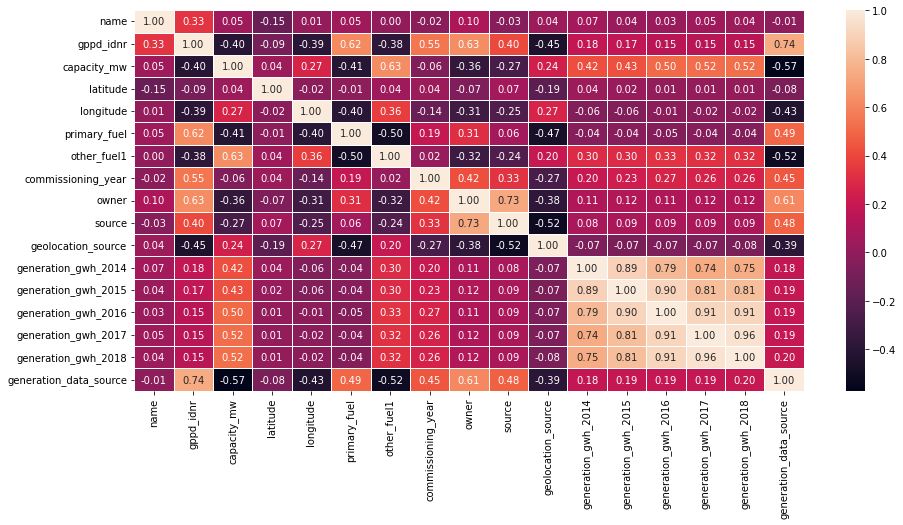

In [294]:
#heatmap for correlation
corr_hmap= fuel_new.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_hmap, annot=True, linewidths=0.9, linecolor="white", fmt='.2f')
plt.show()

#as stated there is multicolinearity present that needs to be removed

In [295]:
fuel_new.shape

(834, 17)

In [296]:
#number of columns
x.shape[1] 

16

In [297]:
#checking the multicollinearity & removing it
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [298]:
#finding vif for each column
def calc_vif(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF Factor']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [299]:
x.shape

(834, 16)

In [300]:
calc_vif(fuel_new)

#we can see that there is high multicolinearity. Hence using PCA to remove it.

variables  VIF Factor
0                     name    5.767758
1                gppd_idnr   18.994332
2              capacity_mw    6.181433
3                 latitude   14.330306
4                longitude  437.091841
5             primary_fuel    8.762900
6              other_fuel1   68.730086
7       commissioning_year  607.648447
8                    owner    4.950118
9                   source    7.316592
10      geolocation_source   16.158290
11     generation_gwh_2014   16.056477
12     generation_gwh_2015   29.859540
13     generation_gwh_2016   35.178619
14     generation_gwh_2017   40.508747
15     generation_gwh_2018   40.250983
16  generation_data_source   12.174928

In [301]:
#clubbing the columns to remove multicolinearity.
from sklearn.decomposition import PCA
pca= PCA(n_components= 14) #making the input columns = 14
xpca=pca.fit_transform(x)
x=xpca

In [302]:
x=pd.DataFrame(x)
x

0         1         2         3         4         5         6   \
0    0.887089 -0.320443  0.763312  0.299538  0.063651  0.057874 -0.019338   
1    0.478530  0.087183  0.069958  0.608218 -0.255274 -0.100088 -0.088673   
2    0.536364  0.030738 -0.024812  0.520642 -0.172332 -0.113723 -0.460805   
3   -0.867027 -0.121592  0.317528  0.532918 -0.161394  0.126414  0.369929   
4   -0.513077  0.954923  0.495387  0.468316 -0.217815  0.250389  0.087257   
5   -0.707542 -0.030709  0.393767  0.517631 -0.086615 -0.025956 -0.561616   
6   -1.019741 -0.579857  0.034866  0.567562  0.286532  0.449921 -0.114919   
7   -0.790038 -0.150667  0.469951  0.511049 -0.268208 -0.241132  0.015149   
8   -0.870189 -0.290024  0.191621  0.501196 -0.164951  0.276278 -0.158729   
9   -0.735543  0.154051  0.365981  0.488120 -0.178894  0.131188  0.122881   
10  -0.602627  0.586635  0.417795  0.450534 -0.249482  0.213865 -0.082240   
11  -0.897117 -0.241400  0.416479  0.541162  0.160626 -0.229499 -0.024211   
12  -0.412505  1.224465  0.555282  0.448076 -0.036909  0.181337  0.104779   
13   0.065711  0.050010  0.200960  0.892030  0.474062 -0.300722  0.222478   
14   0.100982  0.015661  0.046082  0.888459  0.491364  0.012611  0.126781   
15  -0.890346 -0.136972  0.331350  0.497706  0.104015 -0.022626 -0.111762   
16   0.395976  0.188568 -0.003004  0.501213 -0.327263 -0.004559  0.136694   
17  -0.561156  0.726023  0.452961  0.426633 -0.258370  0.184783  0.096145   
18   0.534565  0.007651 -0.096400  0.570049 -0.180728  0.112676  0.005027   
19   0.490689  0.034971 -0.077445  0.566692 -0.165782  0.038614 -0.077465   
20   0.531757  0.028477 -0.094915  0.563358 -0.203434  0.154514 -0.081293   
21  -0.919052 -0.096938  0.346138  0.477828  0.083945 -0.049852  0.016238   
22  -0.881328 -0.252313  0.265238  0.416558 -0.542088  0.152823  0.145823   
23   0.495455  0.072288 -0.059394  0.536714 -0.247415  0.088529  0.105184   
24   0.512660  0.067469 -0.036962  0.512482 -0.242868 -0.006401  0.004573   
25   0.959423 -0.346537  0.779771  0.196045 -0.000305  0.067106  0.064250   
26   0.488460  0.037716 -0.169323  0.519399 -0.164419  0.210217 -0.032074   
27   0.823880 -0.198710  0.581184  0.133786 -0.087373  0.555191  0.045861   
28   0.504563  0.091910 -0.114225  0.429355 -0.235968  0.033746 -0.221886   
29   0.587897  0.019984 -0.258614  0.453489 -0.235293  0.344165 -0.041440   
30   0.495942  0.028975 -0.175412  0.515664 -0.156653  0.210817 -0.027518   
31   0.926370 -0.308661  0.772815  0.171736 -0.001157  0.068744 -0.126508   
32   0.929972 -0.309512  0.771810  0.169548 -0.003098  0.068433 -0.126256   
33   0.931689 -0.309864  0.770812  0.167491 -0.003763  0.068099 -0.126095   
34   0.939329 -0.311805  0.769336  0.165063 -0.008409  0.068883 -0.125891   
35   0.942234 -0.312485  0.768003  0.162944 -0.009863  0.069316 -0.125820   
36   0.944382 -0.312958  0.766886  0.160895 -0.010823  0.069298 -0.125697   
37   0.946169 -0.313331  0.765958  0.158891 -0.011554  0.068887 -0.125530   
38  -0.858775  0.179070  0.413734  0.454383  0.292539 -0.109204 -0.053163   
39   0.513122  0.041991 -0.123049  0.529206 -0.193088  0.161533 -0.070697   
40  -0.625331  0.354325  0.535156  0.425588 -0.102073 -0.275143 -0.099393   
41  -0.680982  0.114209  0.314177  0.397178 -0.327602  0.116902 -0.082825   
42  -0.906504 -0.227154  0.409402  0.474692  0.224300 -0.304548 -0.038109   
43  -0.520133  1.052204  0.473320  0.394960  0.088806  0.183565  0.230483   
44  -0.623709  0.349522  0.357616  0.379871 -0.299518  0.141776 -0.090543   
45  -0.883561  0.026836  0.202014  0.436007  0.194486  0.261222  0.075981   
46   0.428791  0.109271 -0.092348  0.499061 -0.217155  0.062649  0.099818   
47   0.542902  0.004772  0.002157  0.545479 -0.167014 -0.129366 -0.010341   
48  -0.700031  0.158097  0.316775  0.378154 -0.348840  0.147163  0.153823   
49  -0.921212  0.064129  0.273992  0.437032  0.260526  0.138386  0.289314   
50   0.140570  0.047009  0.187895  0.805246  0.353717 -0.361529  0.184534   
51  -0.

In [303]:
y

primary_fuel
0               6
1               1
2               7
3               2
4               1
5               1
6               3
7               3
8               3
9               1
10              1
11              3
12              1
13              3
14              3
16              2
17              1
18              1
19              0
20              0
21              0
22              2
23              1
24              1
25              6
26              6
27              7
28              6
29              7
30              7
31              7
32              6
33              6
34              6
35              6
36              6
37              6
38              6
39              1
40              0
41              3
42              3
43              3
44              1
45              1
46              3
47              1
48              1
49              1
50              1
51              3
52              3
53              3
54              3
55              3
56              1
57              1
58              2
59              1
60              3
61              1
62              1
63              1
64              2
65              3
66              3
67              7
68              7
69              1
70              0
72              5
73              1
74              1
75              1
76              3
77              1
78              3
79              1
81              3
82              3
83              3
84              1
85              3
86              3
87              3
88              1
89              1
90              3
91              3
92              3
93              1
94              0
95              1
96              1
97              1
98              1
99              3
100             3
101             1
102             1
103             1
104             7
105             5
106             2
107             1
108             3
109             5
110             1
111             6
112             6
113             7
114             6
115             6
116             6
117             6
118             6
119             6
120             6
121             6
122             7
123             7
124             7
125             7
126             7
127             6
128             7
129             6
130             6
131             6
132             6
133             1
134             3
135             3
136             3
137             1
138             1
139             1
140             1
141             1
142             1
144             3
145             3
146             3
148             3
149             3
150             3
151             3
152             0
153             6
154             6
155             7
156             6
157             1
159             2
160             4
161             1
162             1
163             1
164             0
165             0
166             3
167             1
168             2
169             3
170             3
171             1
172             1
173             3
174             2
175             2
176             5
177             3
178             3
180             0
181             5
182             3
184             3
185             0
186             3
187             1
188             1
189             1
190             6
192             7
193             6
194             7
195             6
196             6
197             6
198             6
199             6
200             6
201             3
202             3
203             7
204             2
205             7
206             7
207             7
208             7
210             2
211             7
212             2
213             7
214             1
215             2
216             3
217             2
218             2
219             3
220             1
221             3
223             2
224             1
225             7
226             3
227             3
228             3
229             1
230             1
231             3
232      

# Decision Tree

In [477]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [478]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

In [479]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state= 99)

Hyper parameter Tuning

In [480]:
grid_param = {'criterion':['gini', 'entropy']}

In [481]:
gd_sr= GridSearchCV(estimator= dtc,param_grid = grid_param, scoring= 'accuracy', cv= 5)

In [482]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [483]:
best_paramters= gd_sr.best_params_
print(best_paramters)
best_result = gd_sr.best_score_
print(best_result)

#the best parameter is- entropy & accuracy is 83.50%

{'criterion': 'entropy'}
0.8200763101784311


Model Training & prediction

In [484]:
dtc= DecisionTreeClassifier(criterion ='entropy')
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc=dtc.predict(x_test)

In [485]:
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.844311377245509
[[ 4  1  0  0  0  0  0  0]
 [ 2 40  2  1  0  0  0  1]
 [ 0  2  3  8  0  0  0  0]
 [ 0  0  3 43  1  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  1]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.91      0.87      0.89        46
           2       0.27      0.23      0.25        13
           3       0.83      0.91      0.87        47
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        23
           7       0.93      1.00      0.97        28

    accuracy                           0.84       167
   macro avg       0.58      0.60      0.59       167
weighted avg       0.82      0.84      0.83       167



In [486]:
#The accuracy of the model is 84% that can be considered as a good accuracy.


Cross Validation

In [487]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
score= cross_val_score(dtc, x, y, cv=5)
print(score.mean())
print(score)

#by cross validation it shows that the model accuracy is 78.66%

0.802200418440228
[0.7245509  0.8502994  0.81437126 0.78443114 0.8373494 ]


# K Neighbor Classifier

In [495]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [498]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=6)

In [499]:
grid_param = {'n_neighbors':[3,5,11,19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

In [500]:
gd_sr= GridSearchCV(estimator= knn, param_grid = grid_param, verbose=1, cv=3, n_jobs= -1)

In [501]:
gd_sr.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [502]:
best_paramters= gd_sr.best_params_
print(best_paramters)
best_result = gd_sr.best_score_
print(best_result)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.8095449709799486


In [ ]:
#the best parameters are n_neighnors=5, weights = distance, metric = manhattan

In [503]:
knn= KNeighborsClassifier()
knn=KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights= 'distance')
knn.fit(x_train, y_train)
p=knn.predict(x_test)
ac=accuracy_score(y_test, p)
round(ac, 3)

0.922

In [ ]:
#the accuracy of model is 92.2%

In [505]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights= 'distance')
score= cross_val_score(knn, x, y, cv=3)
print(score.mean())
print(score)

#by cross validation it shows that the model accuracy is 81.89%

0.8213429256594723
[0.83093525 0.82733813 0.8057554 ]


# Naive Bayes

In [517]:
from sklearn.naive_bayes import GaussianNB
mnb= GaussianNB()

In [518]:
#finding the best random state
best_accuracy=0
best_rs= 0
for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=i)
    mnb= GaussianNB()
    mnb.fit(x_train, y_train)
    predmnb=mnb.predict(x_test)
    accuracy= accuracy_score(y_test, predmnb)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_rs=i
print("Best Accuracy is ", best_accuracy, "on random state ", best_rs)

#Best Accuracy is at random state= 6

Best Accuracy is  0.8622754491017964 on random state  6


In [519]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state= 6)

In [520]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)}

In [521]:
gd_sr = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [522]:
gd_sr.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [523]:
best_paramters= gd_sr.best_params_
print(best_paramters)
best_result = gd_sr.best_score_
print(best_result)

{'var_smoothing': 4.328761281083062e-05}
0.7795793758480325


In [524]:
#the best parameters = var_smoothing = 4.32876

In [526]:
mnb= GaussianNB(var_smoothing = 4.32)
mnb.fit(x_train, y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test, predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test, predmnb))

#the accuracy is low just 44.9%

0.4491017964071856
[[ 0  7  0  0  0  0  0]
 [ 0 39  0 10  0  0  0]
 [ 0  2  0  6  0  0  0]
 [ 0  8  0 36  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0 31  0  0  0  0  0]
 [ 0 26  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.34      0.80      0.48        49
           2       0.00      0.00      0.00         8
           3       0.69      0.82      0.75        44
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        31
           7       0.00      0.00      0.00        26

    accuracy                           0.45       167
   macro avg       0.15      0.23      0.18       167
weighted avg       0.28      0.45      0.34       167



In [527]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
score= cross_val_score(mnb, x, y, cv=10)
print(score.mean())
print(score)

#by cross validation it shows that the model accuracy is 49%

0.4902467010900745
[0.51190476 0.55952381 0.5        0.52380952 0.43373494 0.54216867
 0.57831325 0.44578313 0.39759036 0.40963855]


# Support Vector Classifier

In [528]:
from sklearn.svm import SVC 
svc=SVC()

In [530]:
#finding the best random state
best_accuracy=0
best_rs= 0
for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    predsvc=svc.predict(x_test)
    accuracy= accuracy_score(y_test, predsvc)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_rs=i
print("Best Accuracy is ", best_accuracy, "on random state ", best_rs)

#best accuracy was found at random state = 6

Best Accuracy is  0.9341317365269461 on random state  6


In [531]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state= 6)

In [532]:
param_grid = {'C': [1, 10],'kernel': ['rbf', 'poly', 'linear']}

In [533]:
grid_sr = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_sr.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [534]:
best_paramters= grid_sr.best_params_
print(best_paramters)
best_result = grid_sr.best_score_
print(best_result)

{'C': 10, 'kernel': 'rbf'}
0.8545281113230839


In [ ]:
#the best parameter is kernel = rbf and C= 10

In [536]:
svc=SVC(kernel='rbf', C=10)
svc.fit(x_train, y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9520958083832335
[[ 7  0  0  0  0  0  0]
 [ 1 47  1  0  0  0  0]
 [ 0  1  5  2  0  0  0]
 [ 0  0  0 44  0  0  0]
 [ 0  1  0  1  0  0  0]
 [ 0  1  0  0  0 30  0]
 [ 0  0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.94      0.96      0.95        49
           2       0.83      0.62      0.71         8
           3       0.94      1.00      0.97        44
           5       0.00      0.00      0.00         2
           6       1.00      0.97      0.98        31
           7       1.00      1.00      1.00        26

    accuracy                           0.95       167
   macro avg       0.80      0.79      0.79       167
weighted avg       0.94      0.95      0.94       167



In [ ]:
#the model accuracy is 95%

In [535]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
score= cross_val_score(svc, x, y)
print(score.mean())
print(score)

#the mean accuracy is 84%

0.8417790924175745
[0.82035928 0.86826347 0.82035928 0.81437126 0.88554217]


# Random Forest Classifier

In [537]:
from sklearn.ensemble import RandomForestClassifier

In [538]:
rnd= RandomForestClassifier()

In [540]:
#finding the best random state
best_accuracy=0
best_rs= 0
for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=i)
    rnd= RandomForestClassifier()
    rnd.fit(x_train, y_train)
    predrnd= rnd.predict(x_test)
    accuracy= accuracy_score(y_test, predrnd)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_rs=i
print("Best Accuracy is ", best_accuracy, "on random state ", best_rs)

#best accuracy was found at random state = 6

Best Accuracy is  0.9520958083832335 on random state  6


In [541]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state= 6)

In [542]:
rnd= RandomForestClassifier()
rnd.fit(x_train, y_train)
predrnd=rnd.predict(x_test)
print(accuracy_score(y_test, predrnd))
print(confusion_matrix(y_test,predrnd))
print(classification_report(y_test, predrnd))

0.9520958083832335
[[ 7  0  0  0  0  0  0]
 [ 1 47  1  0  0  0  0]
 [ 0  1  5  2  0  0  0]
 [ 0  0  0 44  0  0  0]
 [ 0  1  0  1  0  0  0]
 [ 0  1  0  0  0 30  0]
 [ 0  0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.94      0.96      0.95        49
           2       0.83      0.62      0.71         8
           3       0.94      1.00      0.97        44
           5       0.00      0.00      0.00         2
           6       1.00      0.97      0.98        31
           7       1.00      1.00      1.00        26

    accuracy                           0.95       167
   macro avg       0.80      0.79      0.79       167
weighted avg       0.94      0.95      0.94       167



In [ ]:
#the accuracy of model is 95%

In [543]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
score= cross_val_score(rnd, x, y, cv=5)
print(score.mean())
print(score)

#the mean accuracy = 86.45%

0.8645335834355385
[0.79640719 0.91017964 0.88622754 0.84431138 0.88554217]


In [544]:
#saving Data Frame
project_global=pd.DataFrame(predrnd)
project_global.to_csv("poject_global_rnd.csv")

In [547]:
#saving model
import pickle

file_global = 'poject_global_rnd.pkl'
pickle.dump(rnd, open(file_global, 'wb'))

In [548]:
#load model from disk
model_rnd = pickle.load(open(file_global, 'rb'))

In [549]:
#model prediction
result_rnd = model_rnd.score(x_test, y_test)
print(result_rnd)

#Prediction is correct upto 95.20%

0.9520958083832335
